I'm gonna test a bunch of stylized facts on 9 stocks. See Giuseppe Paleologo's book *Elements of Quantitative Investing* and references.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
import yfinance as yf

In [3]:
data = yf.download('AAPL TSLA AMZN MSFT GOOG META INTC T META NFLX', start = "2014-09-04", end="2024-09-04")
returns = data.pct_change().dropna()
returns = returns["Adj Close"]

[*********************100%***********************]  9 of 9 completed


Stylized Fact 1: "The unconditional distribution of returns shows heavy tail behavior.... The probability of a large return is higher than what would be consistent with
any 'thin-tailed' distribution with infinite moments."

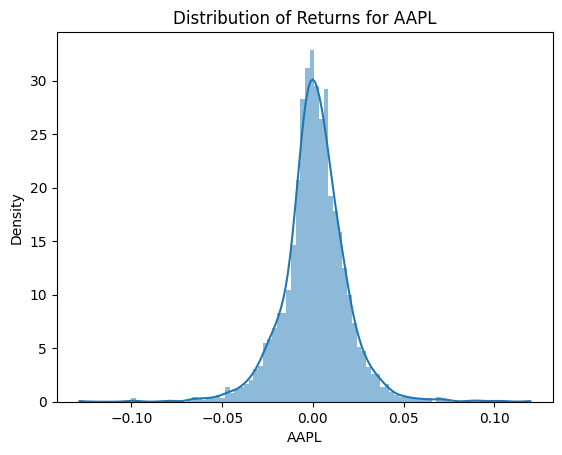

AAPL Kurtosis: 8.239534822108471
AAPL P-value for normality test: 1.796693618814295e-64



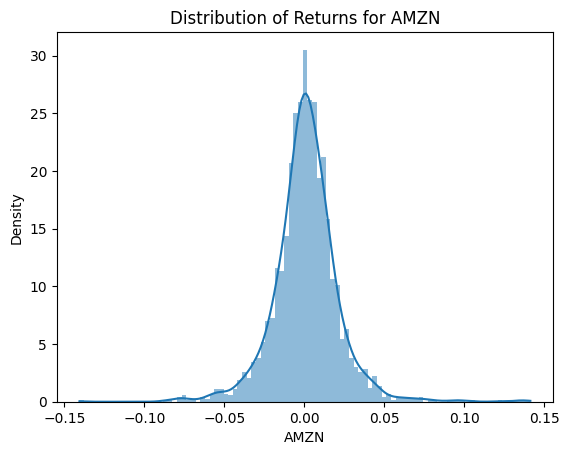

AMZN Kurtosis: 9.25986266959827
AMZN P-value for normality test: 1.0508785853225289e-85



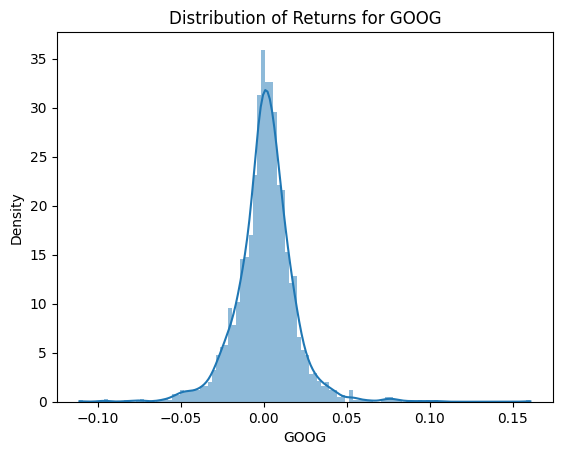

GOOG Kurtosis: 9.875188212258697
GOOG P-value for normality test: 1.9130597362296923e-84



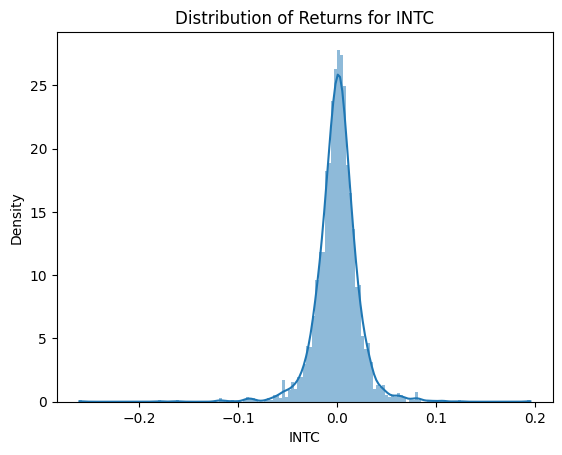

INTC Kurtosis: 18.964373805204346
INTC P-value for normality test: 3.297887090179991e-176



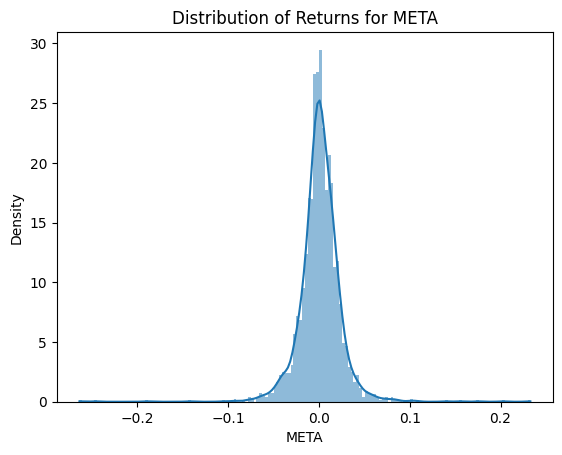

META Kurtosis: 24.752306598464607
META P-value for normality test: 7.008142866153124e-152



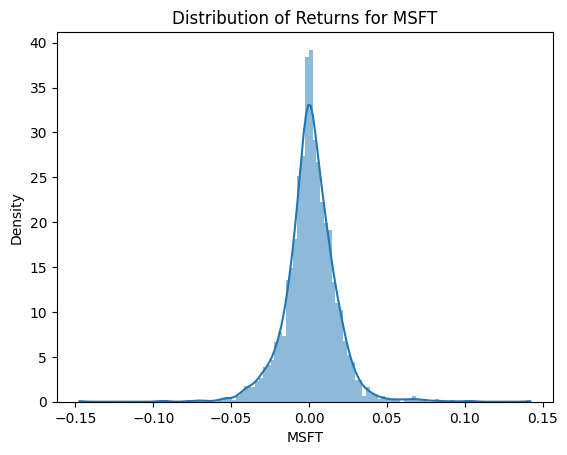

MSFT Kurtosis: 10.739672683445162
MSFT P-value for normality test: 3.642330985491206e-85



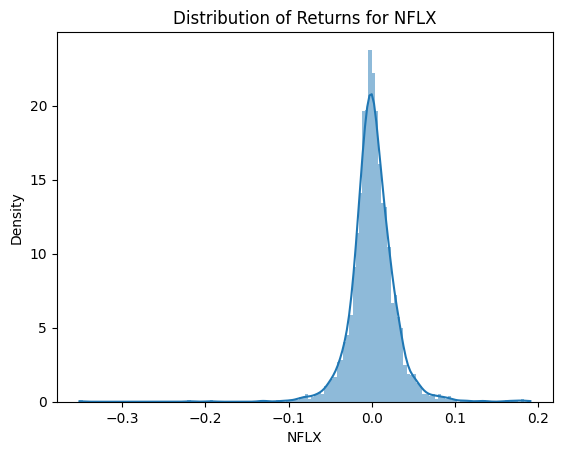

NFLX Kurtosis: 20.638076948201476
NFLX P-value for normality test: 5.2374808441133965e-149



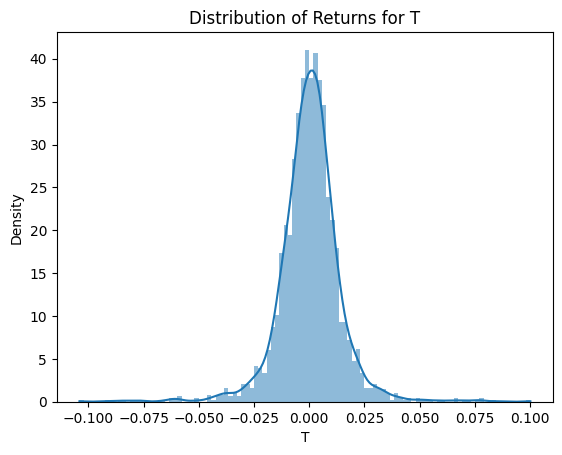

T Kurtosis: 11.412032638150729
T P-value for normality test: 4.432863785680872e-95



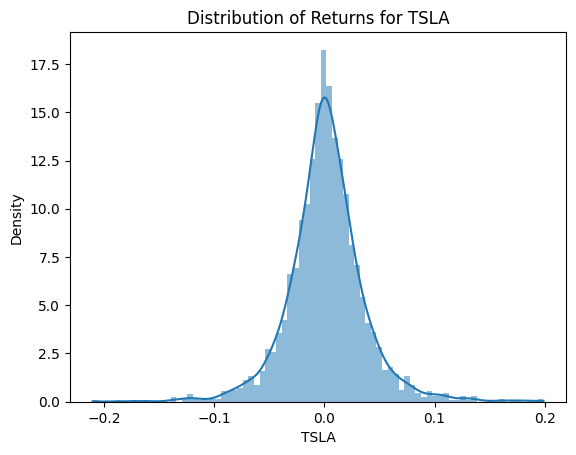

TSLA Kurtosis: 7.21377282252574
TSLA P-value for normality test: 1.2474396771466945e-57



In [44]:
def fat_tails(returns):
    for col in returns.columns:
        sns.histplot(returns[col], kde=True, stat="density", linewidth=0)
        plt.title(f"Distribution of Returns for {col}")
        plt.show()

        kurtosis_value = stats.kurtosis(returns[col], fisher=False)
        print(f"{col} Kurtosis: {kurtosis_value}")
        _, p_value_normality = stats.normaltest(returns[col])
        print(f"{col} P-value for normality test: {p_value_normality}\n")
fat_tails(returns)

Stylized Fact 2: Volatility Clustering. This stylized fact helps justify the formulation of the GARCH model. Indeed, it has volatility clustering by construction (with damping).

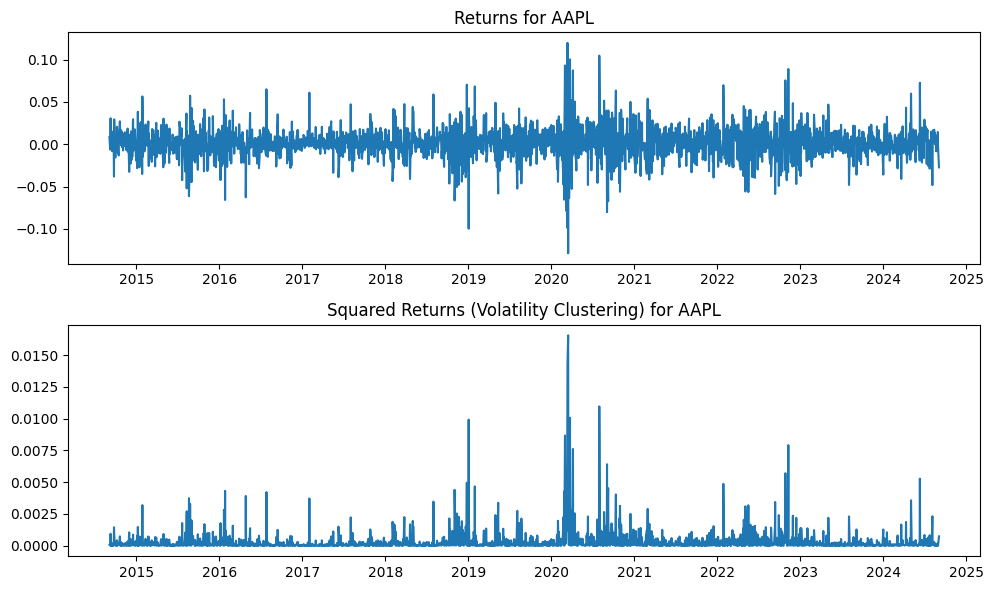

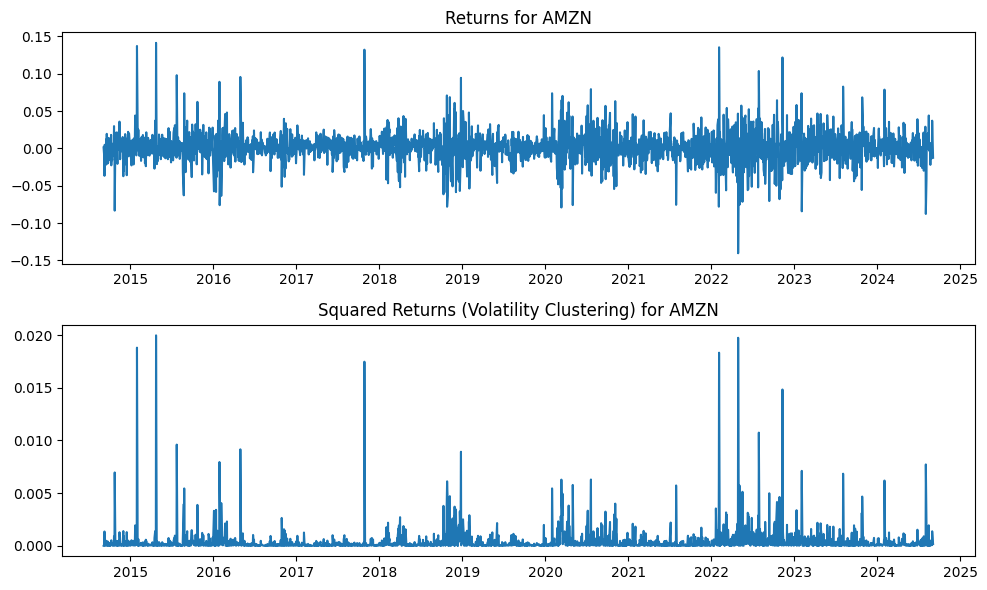

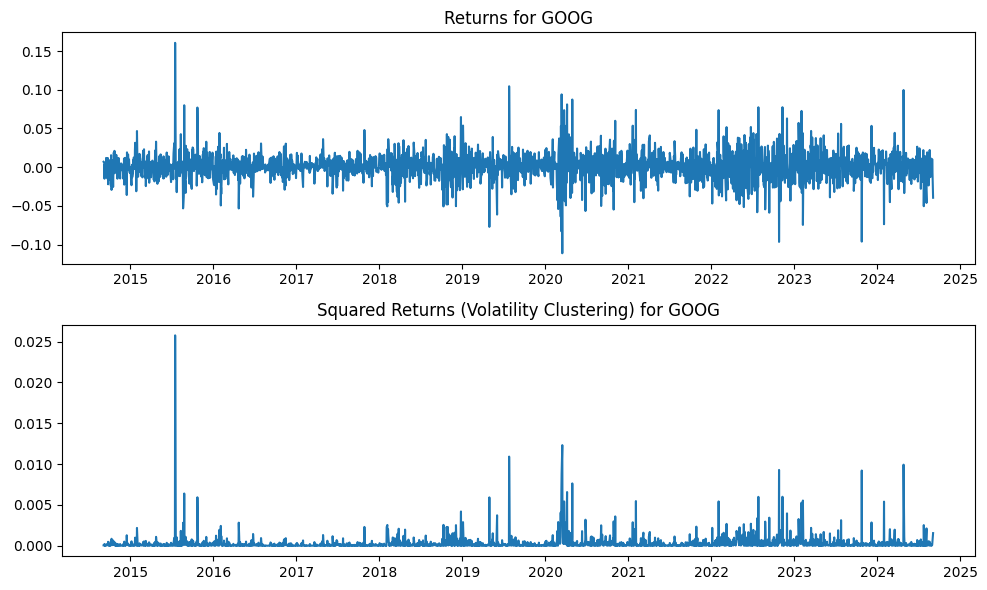

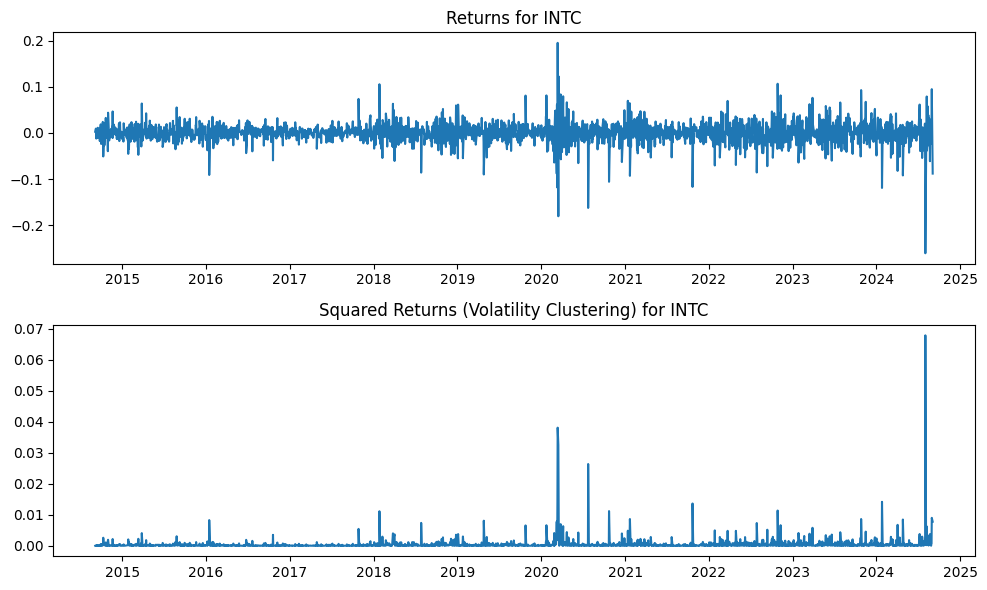

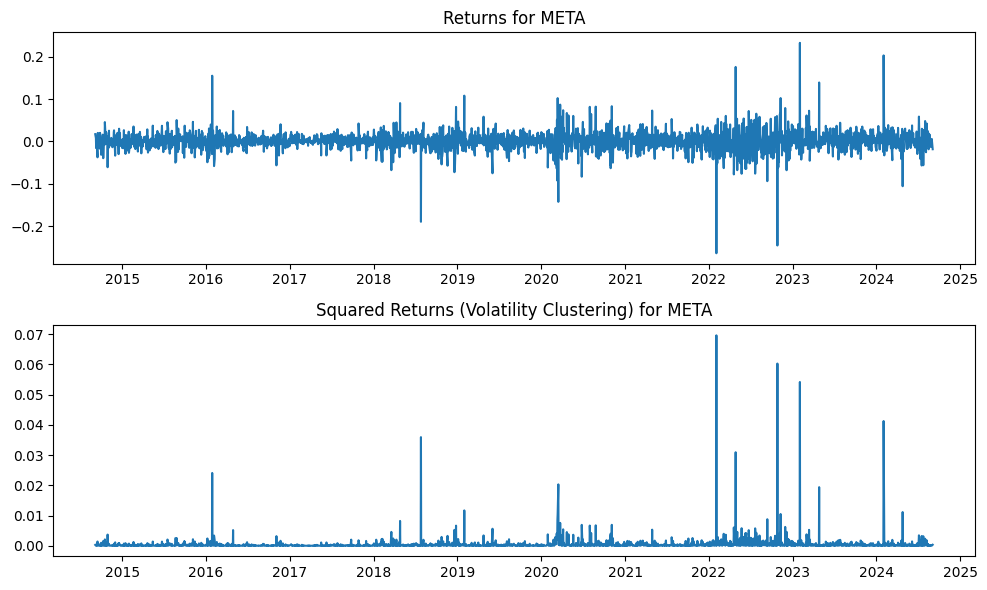

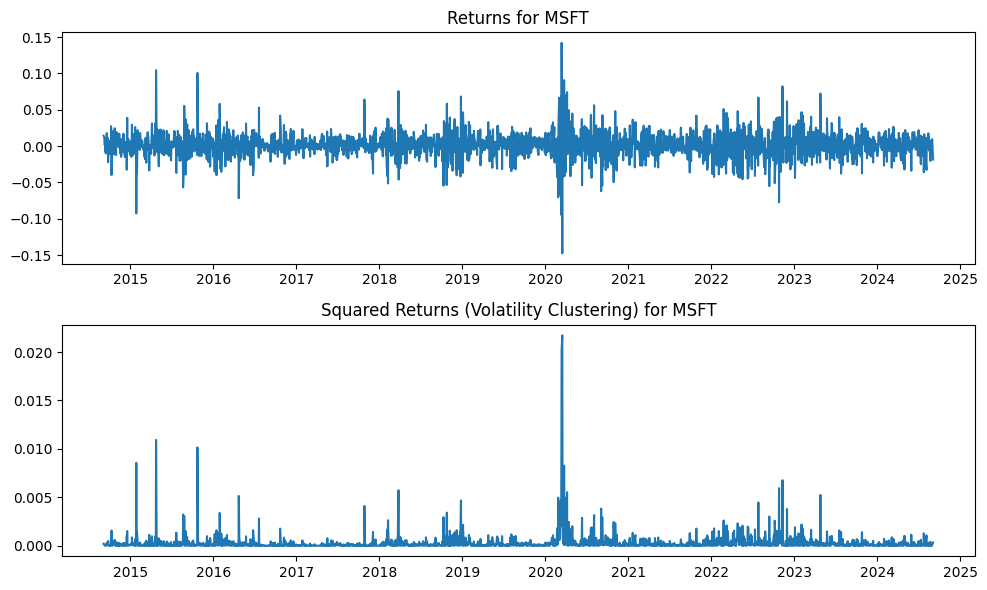

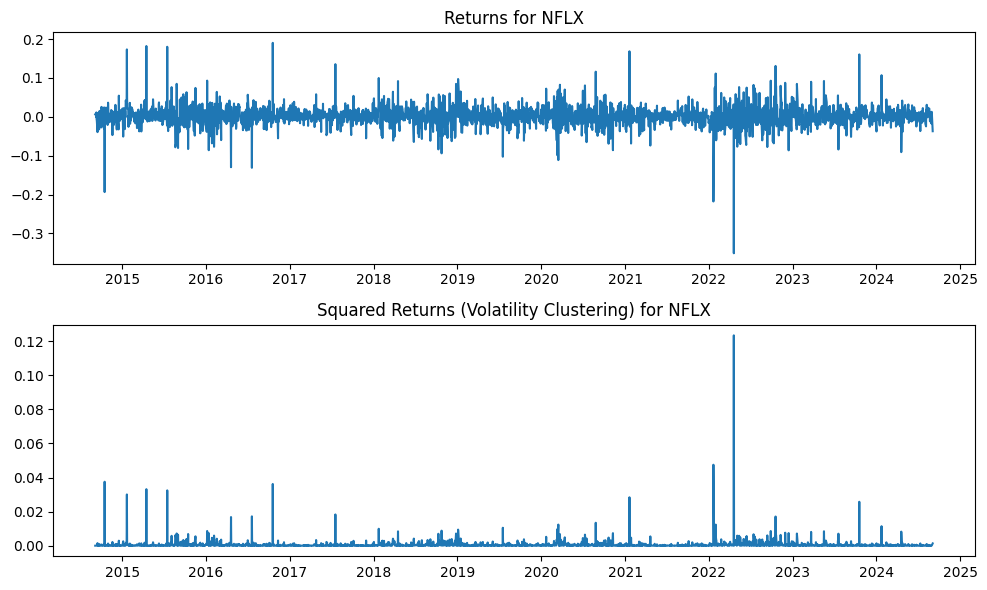

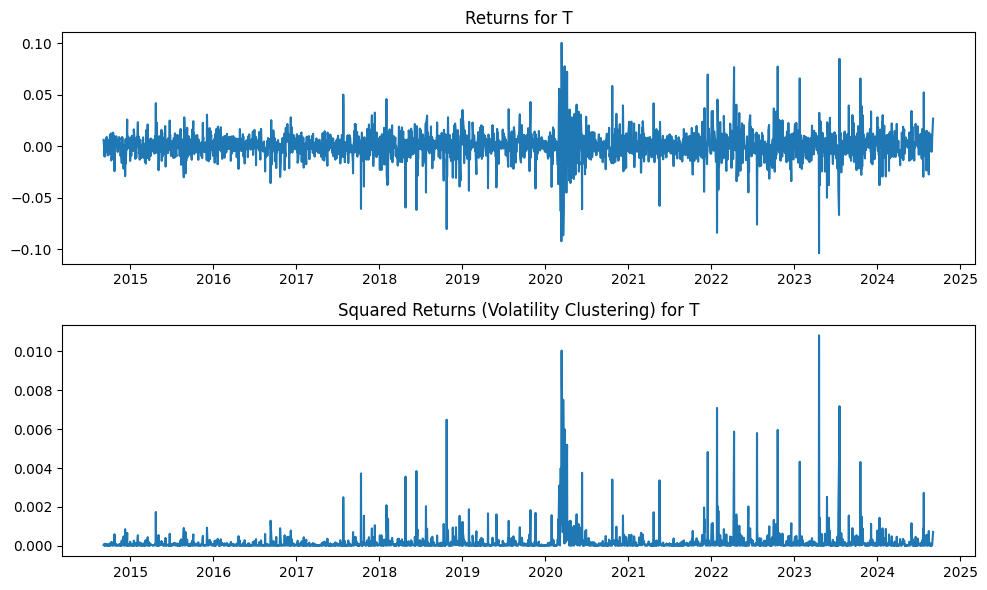

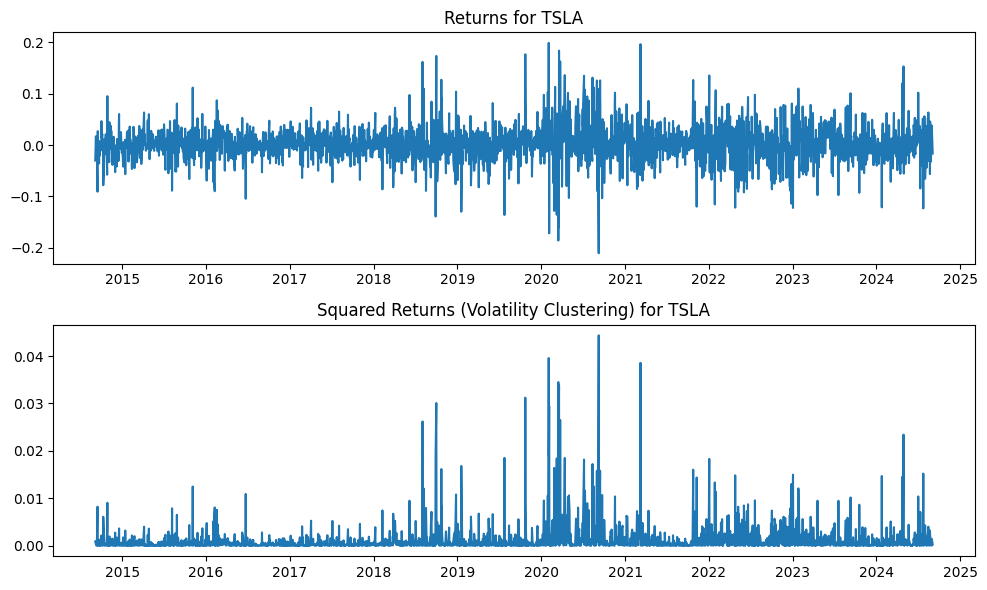

In [45]:
def volatility_clustering(returns):
    for col in returns.columns:
        
        if isinstance(col, tuple):
            col_str = '_'.join(col)
        else:
            col_str = col
        
        returns[col_str + '_Squared'] = returns[col] ** 2
        
        fig, ax = plt.subplots(2, 1, figsize=(10, 6))
        ax[0].plot(returns[col])
        ax[0].set_title(f'Returns for {col_str}')
        ax[1].plot(returns[col_str + '_Squared'])
        ax[1].set_title(f'Squared Returns (Volatility Clustering) for {col_str}')
        plt.tight_layout()
        plt.show()
volatility_clustering(returns)

Stylized Fact 3: Absence of autocorrelation in returns at sufficiently large timescales. I've heard that you see autocorrelation in high-frequency settings, intraday even (due to market microstructure). We do see autocorrelation of *squared returns*.

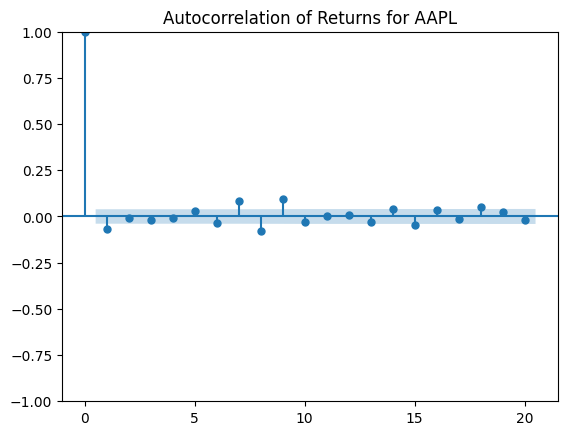

AAPL Autocorrelation values for first few lags: [ 1.         -0.06688812 -0.00643904 -0.01913121 -0.0089515 ]



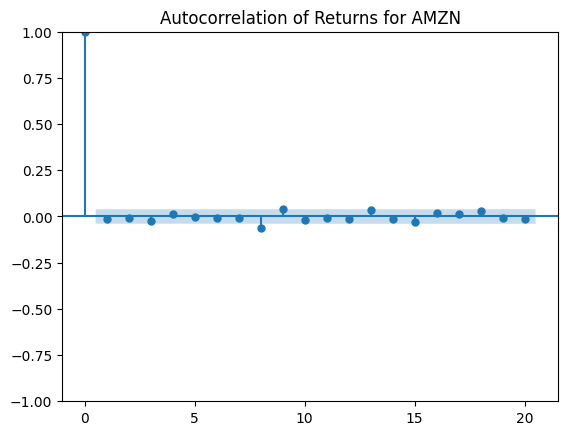

AMZN Autocorrelation values for first few lags: [ 1.         -0.0115016  -0.00612031 -0.02671172  0.01340418]



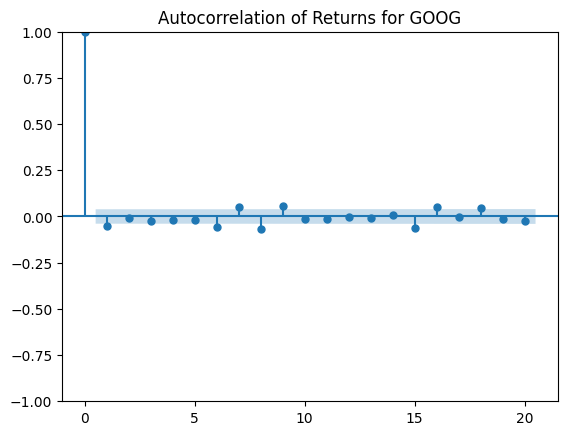

GOOG Autocorrelation values for first few lags: [ 1.         -0.0500805  -0.00784096 -0.02647287 -0.01694948]



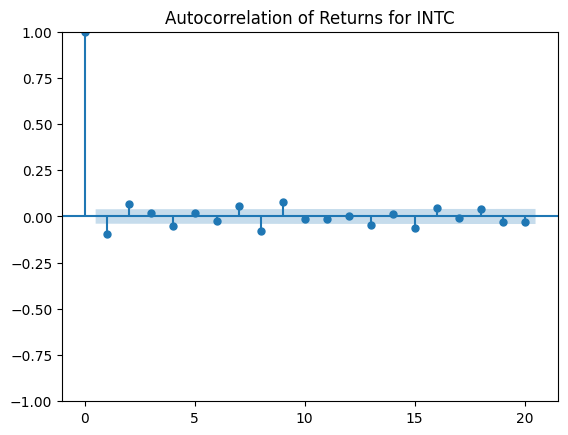

INTC Autocorrelation values for first few lags: [ 1.         -0.09394128  0.06646509  0.01795097 -0.05386653]



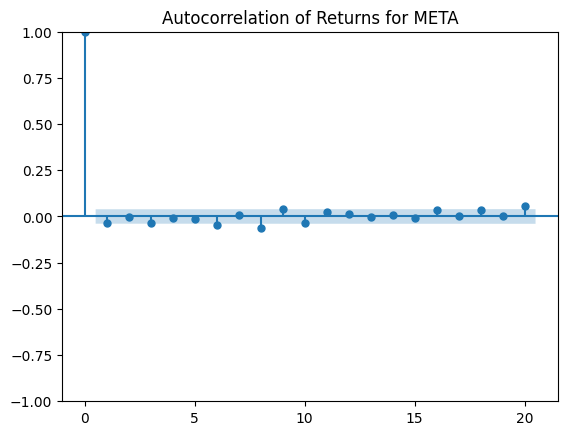

META Autocorrelation values for first few lags: [ 1.         -0.03512348 -0.00185739 -0.03424585 -0.00789587]



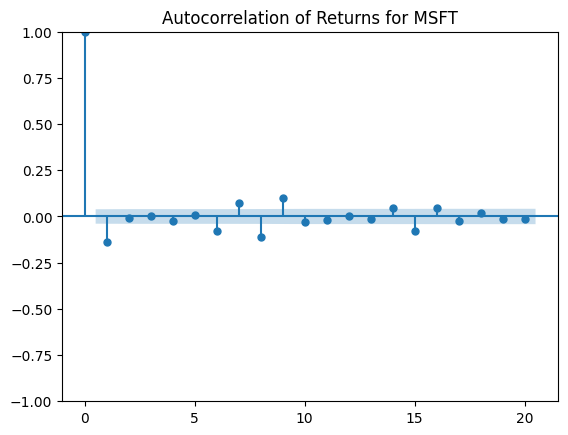

MSFT Autocorrelation values for first few lags: [ 1.         -0.13861987 -0.00983096  0.00207874 -0.0225576 ]



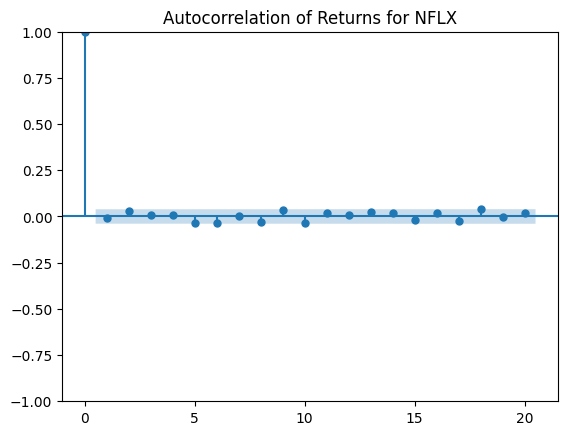

NFLX Autocorrelation values for first few lags: [ 1.         -0.00663189  0.03089951  0.0099675   0.00794341]



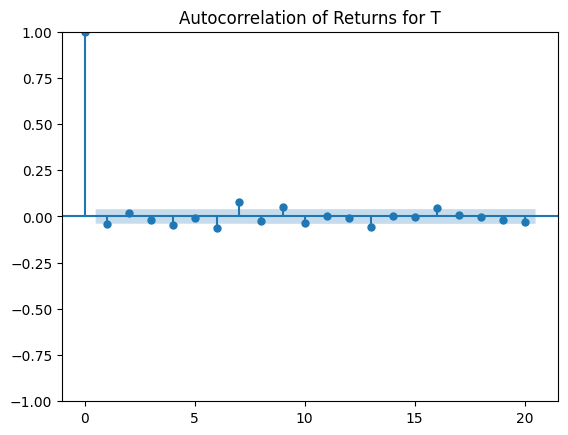

T Autocorrelation values for first few lags: [ 1.         -0.04132465  0.01950836 -0.02153006 -0.04457693]



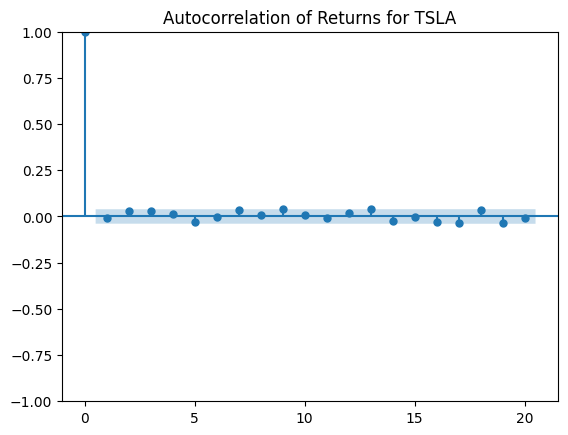

TSLA Autocorrelation values for first few lags: [ 1.         -0.00574594  0.03113313  0.0274097   0.01273614]



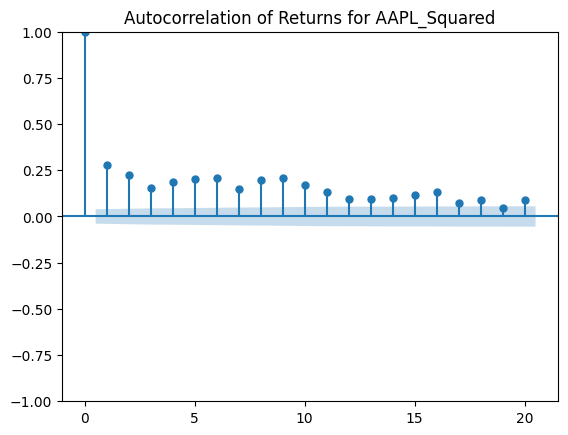

AAPL_Squared Autocorrelation values for first few lags: [1.         0.2794485  0.22614941 0.15212448 0.18486392]



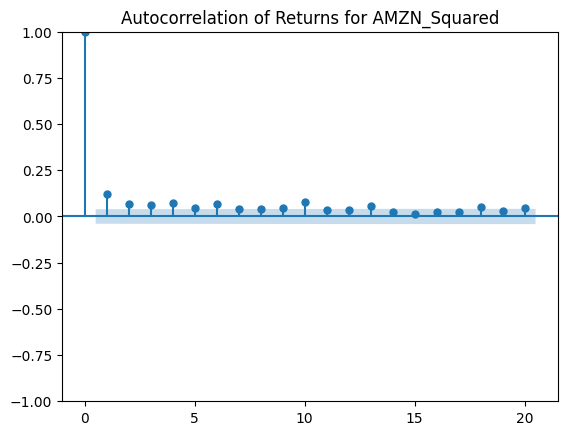

AMZN_Squared Autocorrelation values for first few lags: [1.         0.12118281 0.06484288 0.06304703 0.07202869]



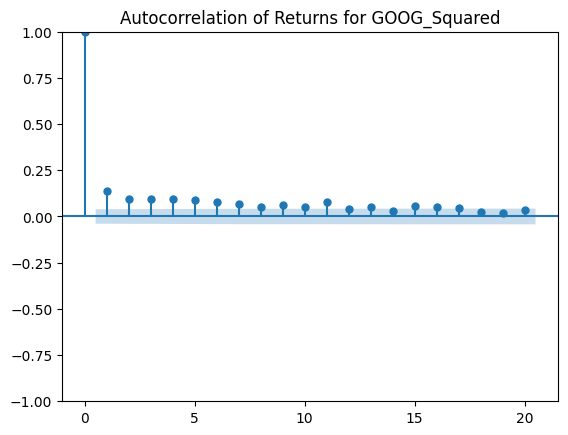

GOOG_Squared Autocorrelation values for first few lags: [1.         0.13968392 0.0932555  0.09633285 0.09479134]



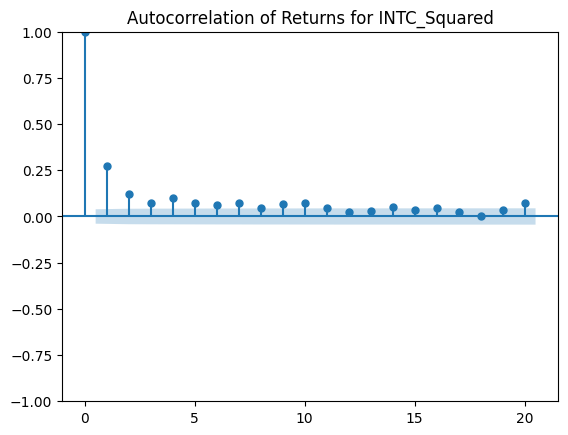

INTC_Squared Autocorrelation values for first few lags: [1.         0.27172306 0.11931351 0.07545225 0.09882325]



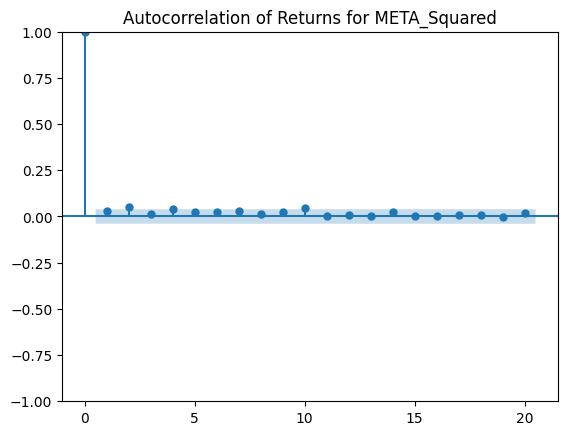

META_Squared Autocorrelation values for first few lags: [1.         0.02895854 0.05224845 0.01596827 0.04056528]



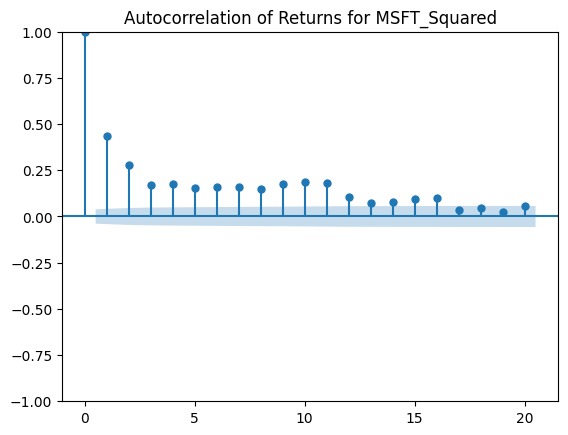

MSFT_Squared Autocorrelation values for first few lags: [1.         0.43331672 0.28048755 0.16999951 0.17392272]



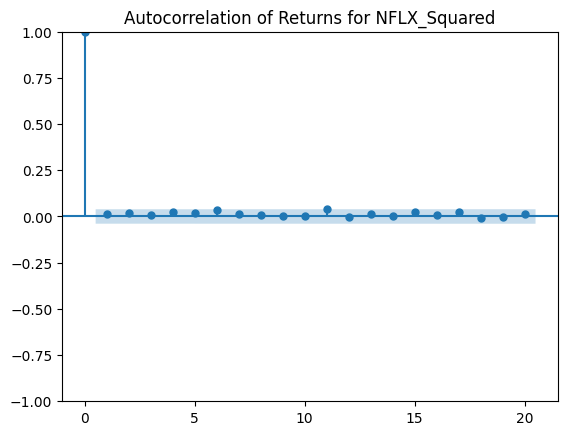

NFLX_Squared Autocorrelation values for first few lags: [1.         0.0156334  0.01755032 0.01036427 0.02652929]



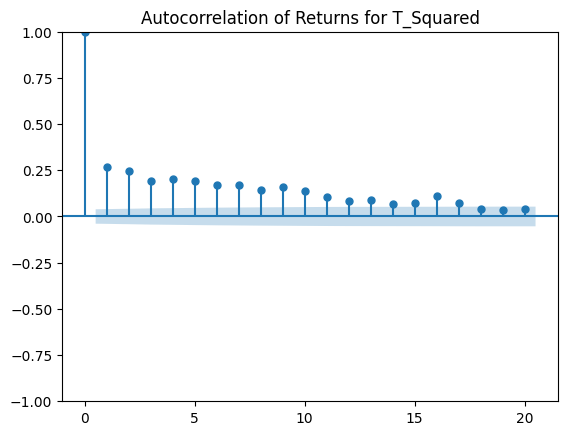

T_Squared Autocorrelation values for first few lags: [1.         0.26670149 0.24593129 0.19218827 0.20368698]



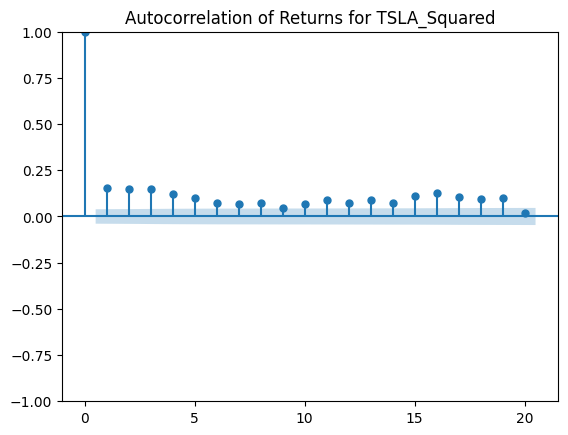

TSLA_Squared Autocorrelation values for first few lags: [1.         0.15577966 0.14983148 0.15040141 0.12015506]



In [46]:
def autocorrelation(returns):
    for col in returns.columns:
        acf_values = acf(returns[col], fft=False)
        plot_acf(returns[col], lags=20)
        plt.title(f"Autocorrelation of Returns for {col}")
        plt.show()
        print(f"{col} Autocorrelation values for first few lags: {acf_values[:5]}\n")
autocorrelation(returns)

Stylized Fact 4: Correlation Between Volume and Volatility.

C:\Users\zachb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003227. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


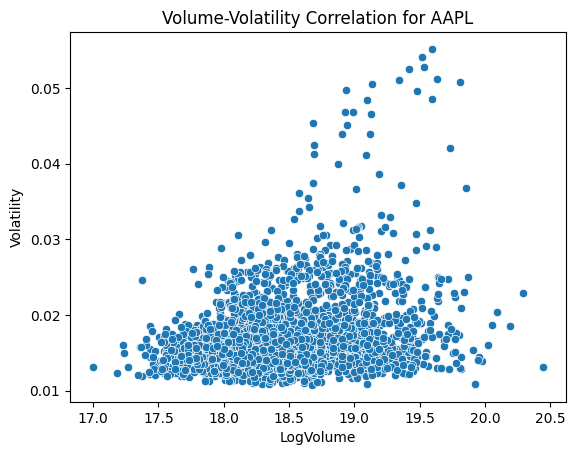

AAPL Correlation between Log(Volume) and Volatility: 0.271115285277904



C:\Users\zachb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004256. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


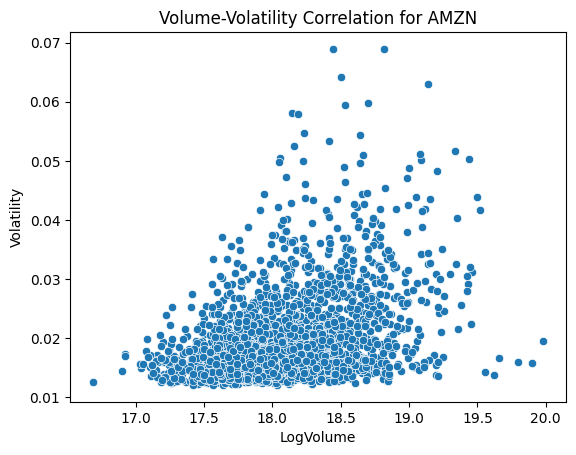

AMZN Correlation between Log(Volume) and Volatility: 0.3984318894036295



C:\Users\zachb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003175. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


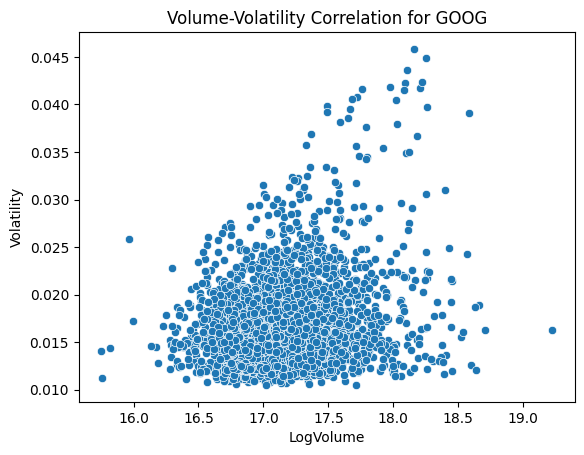

GOOG Correlation between Log(Volume) and Volatility: 0.22471856460315057



C:\Users\zachb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004877. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


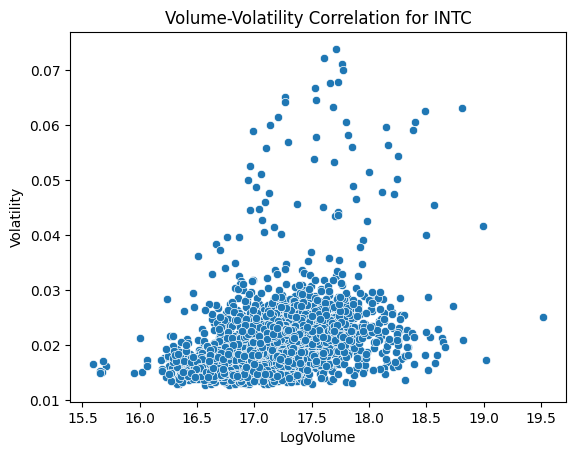

INTC Correlation between Log(Volume) and Volatility: 0.38530771943353986



C:\Users\zachb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005587. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


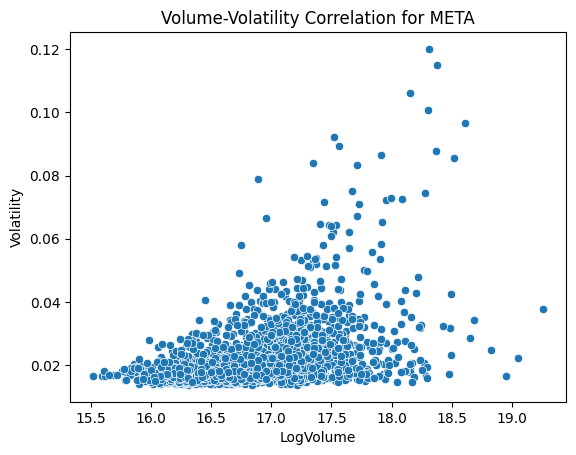

META Correlation between Log(Volume) and Volatility: 0.44344974028226913



C:\Users\zachb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002922. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


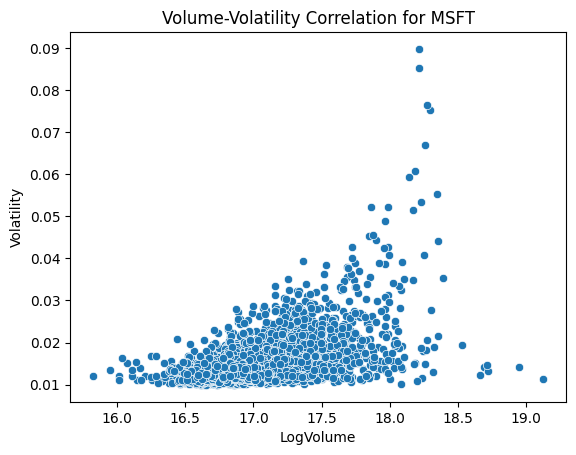

MSFT Correlation between Log(Volume) and Volatility: 0.47525523438556505



C:\Users\zachb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007695. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


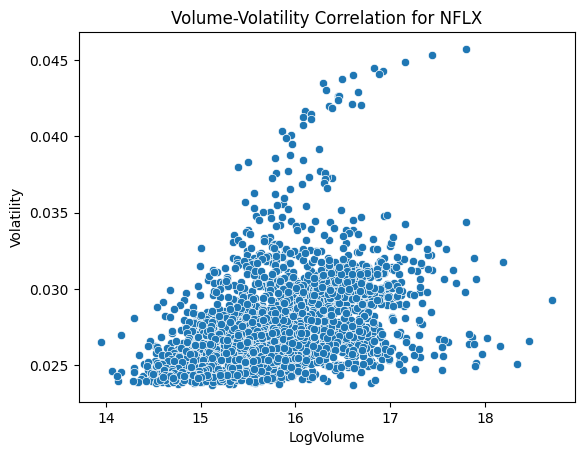

NFLX Correlation between Log(Volume) and Volatility: 0.40678127290173866



C:\Users\zachb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002015. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


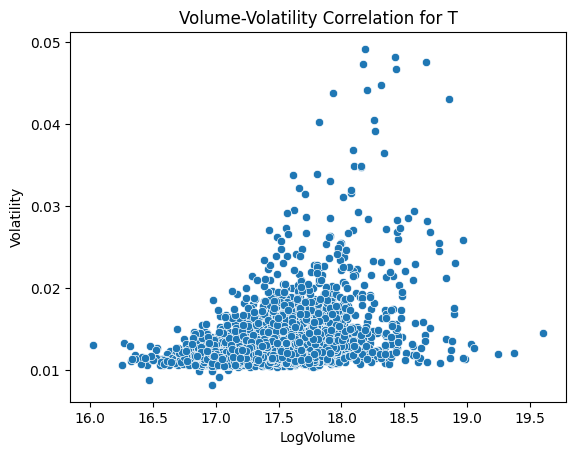

T Correlation between Log(Volume) and Volatility: 0.40303472622626846



C:\Users\zachb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00125. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


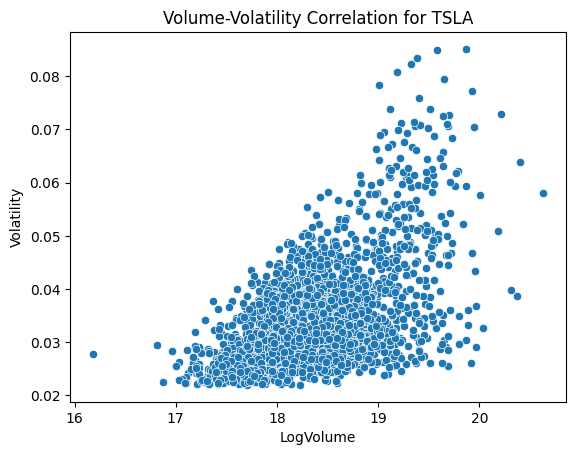

TSLA Correlation between Log(Volume) and Volatility: 0.5249548110118099



In [27]:
def volume_volatility_correlation(data, returns):

    log_volume = pd.DataFrame(index=data.index)

    for col in returns.columns:

        volume_col = data['Volume']

        log_volume[f'LogVolume_{col}'] = np.log(volume_col.loc[:, col])

        # Let's estimate volatility using GARCH
        garch_model = arch_model(returns[col], vol='Garch', p=1, q=1, dist='Normal')
        garch_results = garch_model.fit(disp="off")

        returns[f'Volatility_{col}'] = garch_results.conditional_volatility

        collated_data = pd.DataFrame({
            'LogVolume': log_volume[f'LogVolume_{col}'],
            'Volatility': returns[f'Volatility_{col}']
        }).dropna()  # I was getting missing value errors

        sns.scatterplot(x=collated_data['LogVolume'], y=collated_data['Volatility'])
        plt.title(f'Volume-Volatility Correlation for {col}')
        plt.show()

        corr_volatility_volume = np.corrcoef(collated_data['LogVolume'], collated_data['Volatility'])[0, 1]
        print(f"{col} Correlation between Log(Volume) and Volatility: {corr_volatility_volume}\n")

        # I'm getting some weird error that I can't debug: this fixes it
        if col == "TSLA":
            break

volume_volatility_correlation(data, returns)


Stylized Fact 5: Absolute returns and squared returns have high autocorrelation. The autocorrelation of the former is generally higher than the autocorrelation of the latter (the Taylor Effect). I'm going to repeat the squared returns that we saw before.

C:\Users\zachb\AppData\Local\Temp\ipykernel_660\1002512918.py:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(1, 11), autocorr_abs, basefmt=" ", use_line_collection=True)
C:\Users\zachb\AppData\Local\Temp\ipykernel_660\1002512918.py:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(1, 11), autocorr_squared, basefmt=" ", use_line_collection=True)


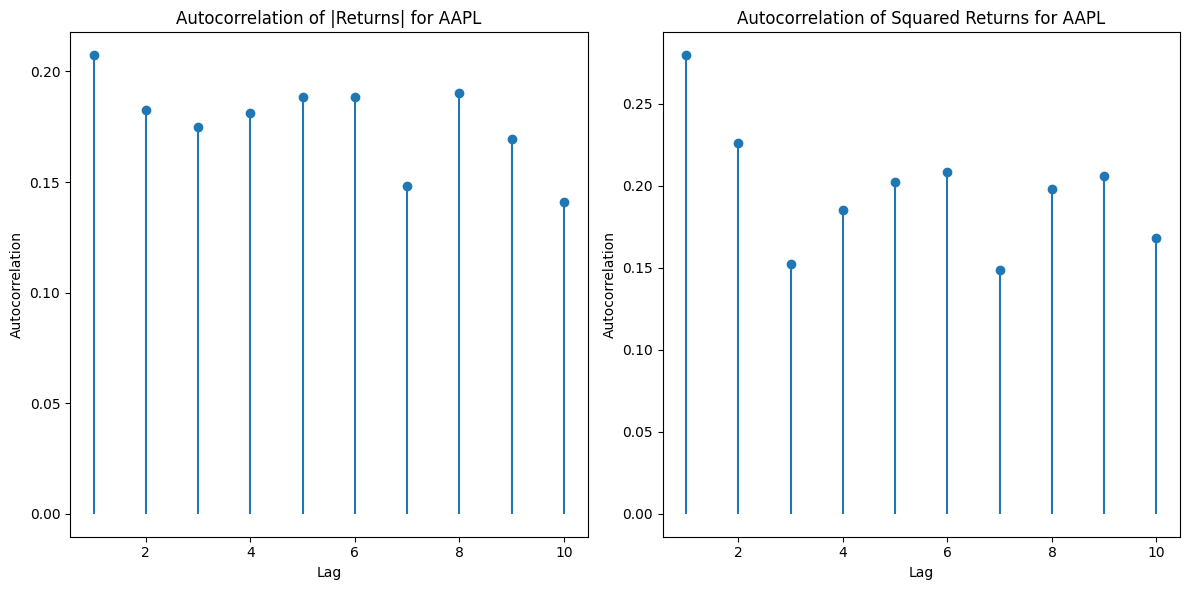

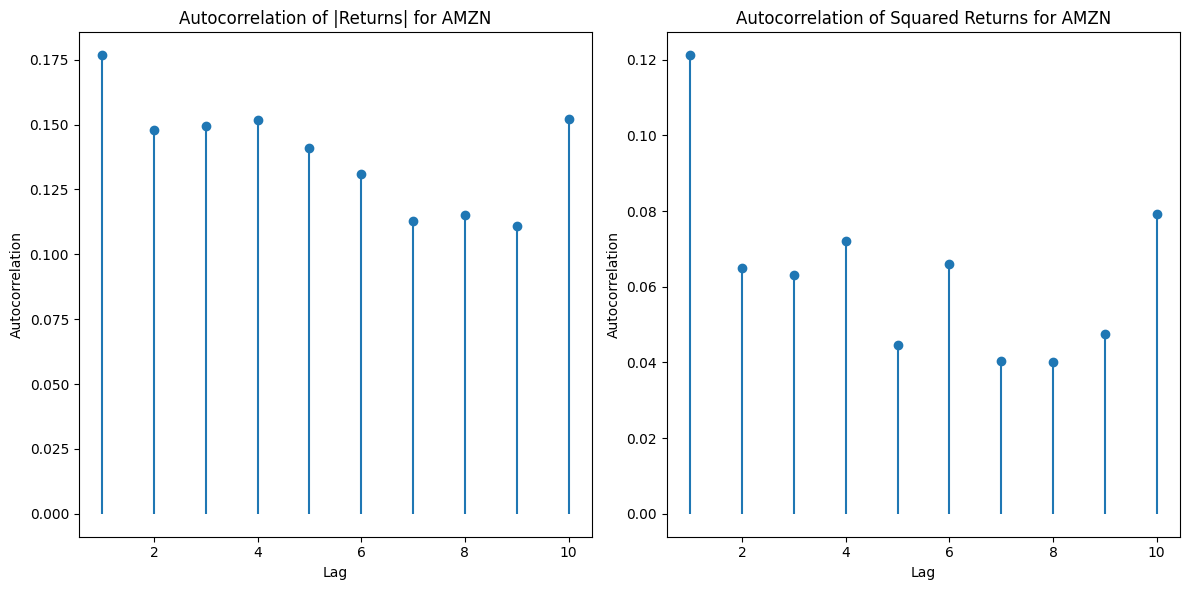

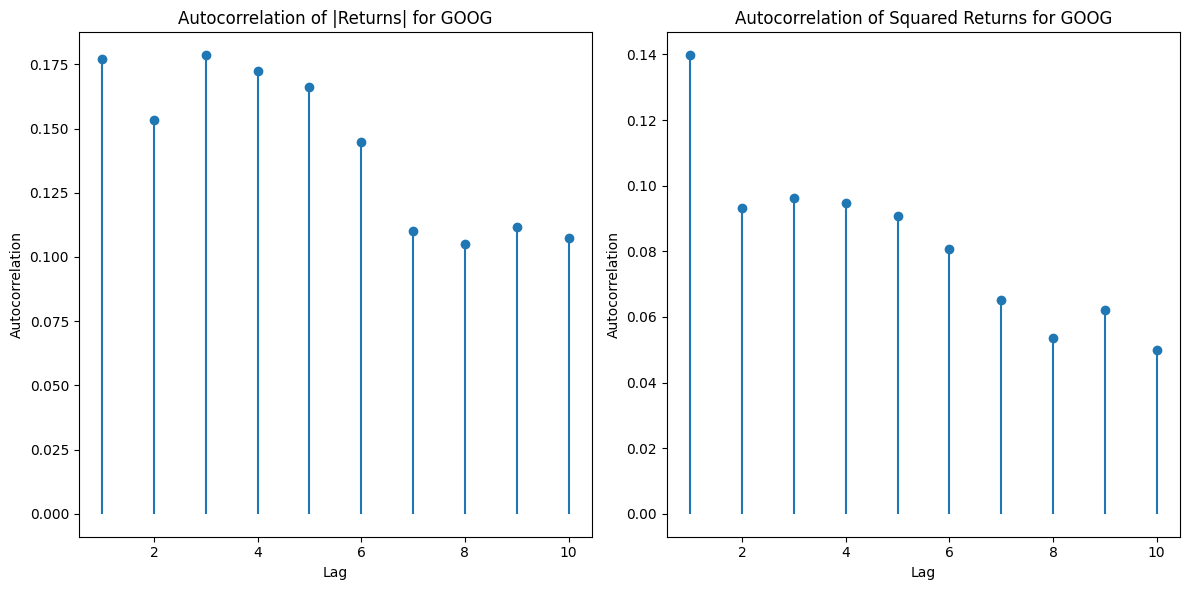

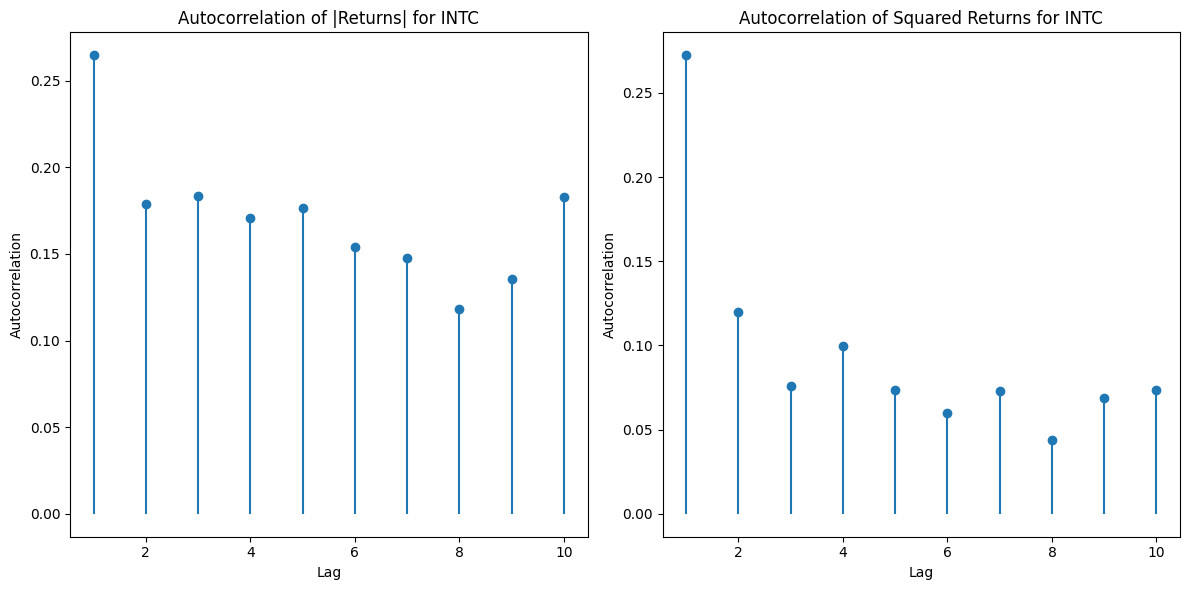

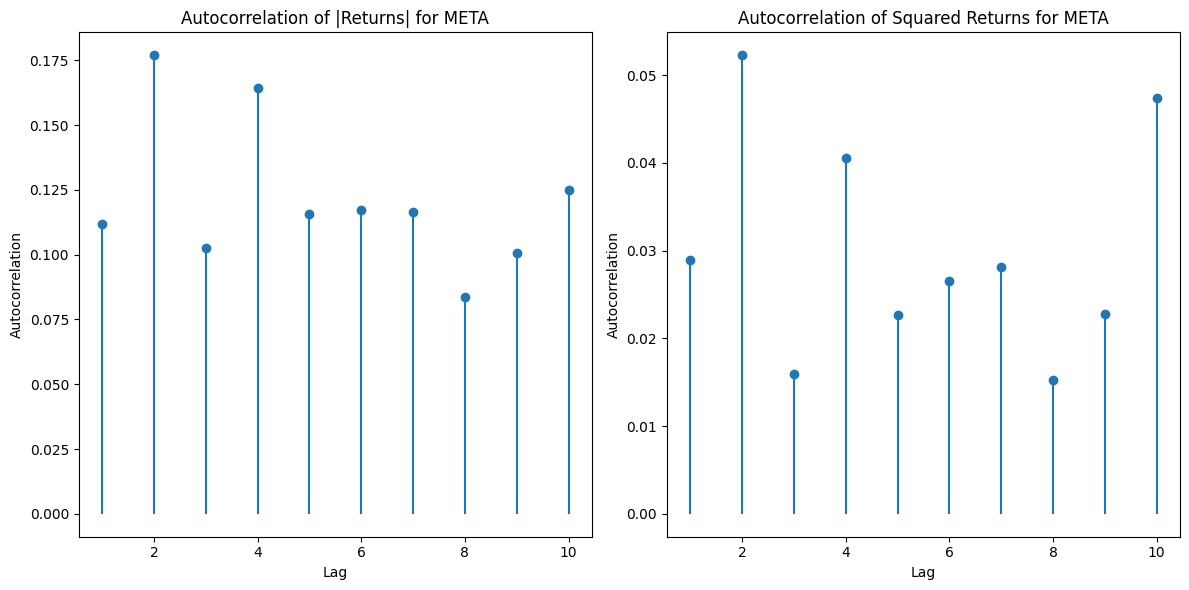

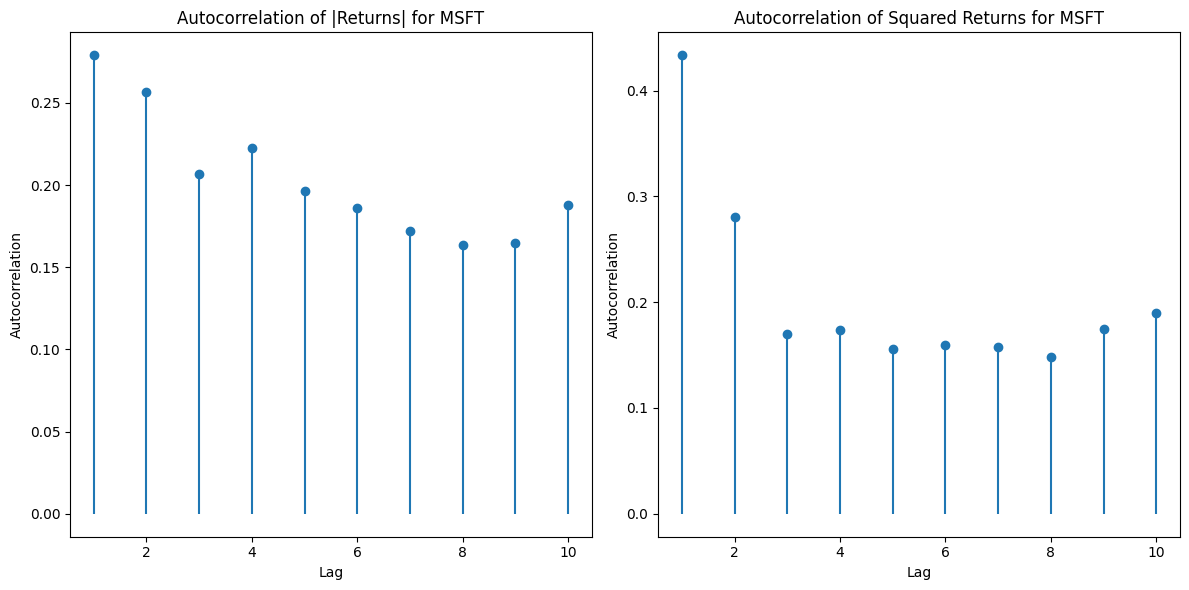

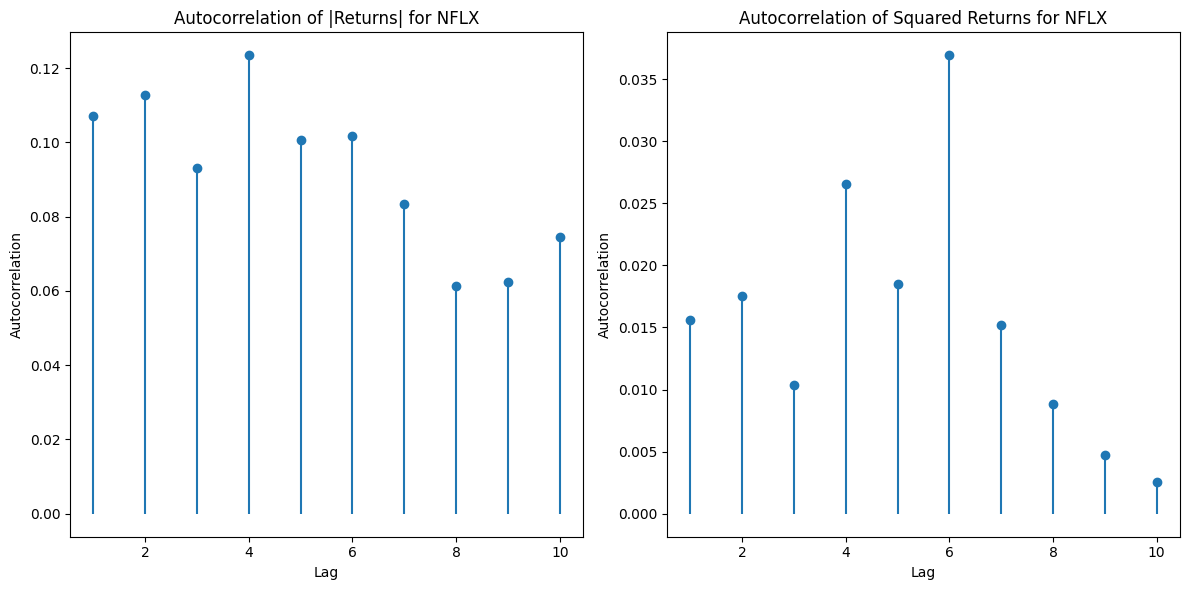

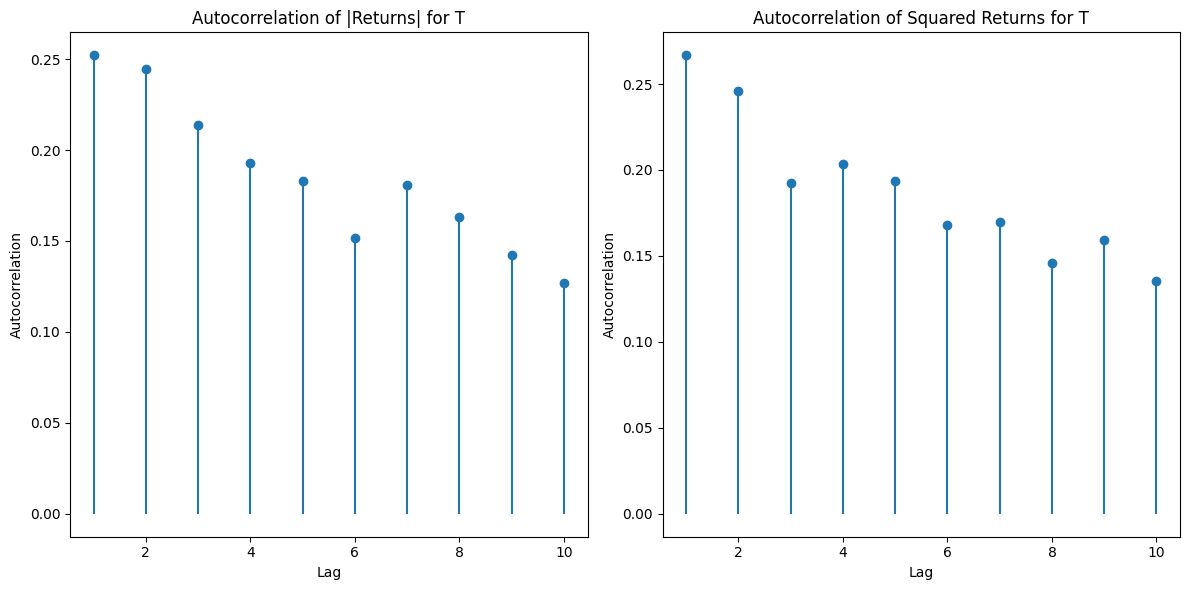

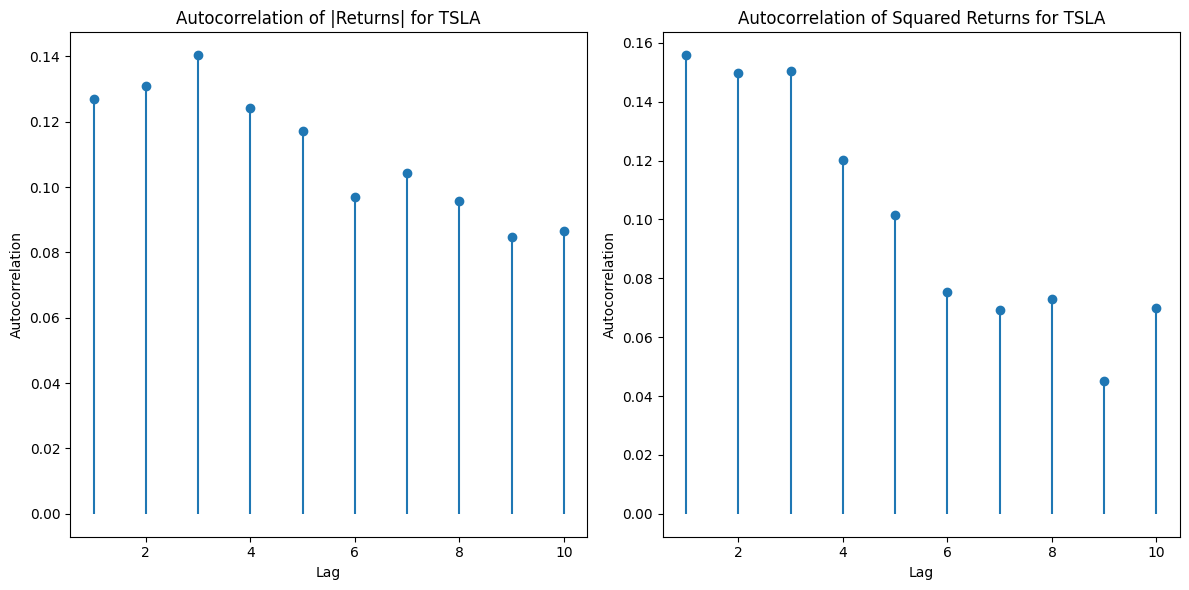

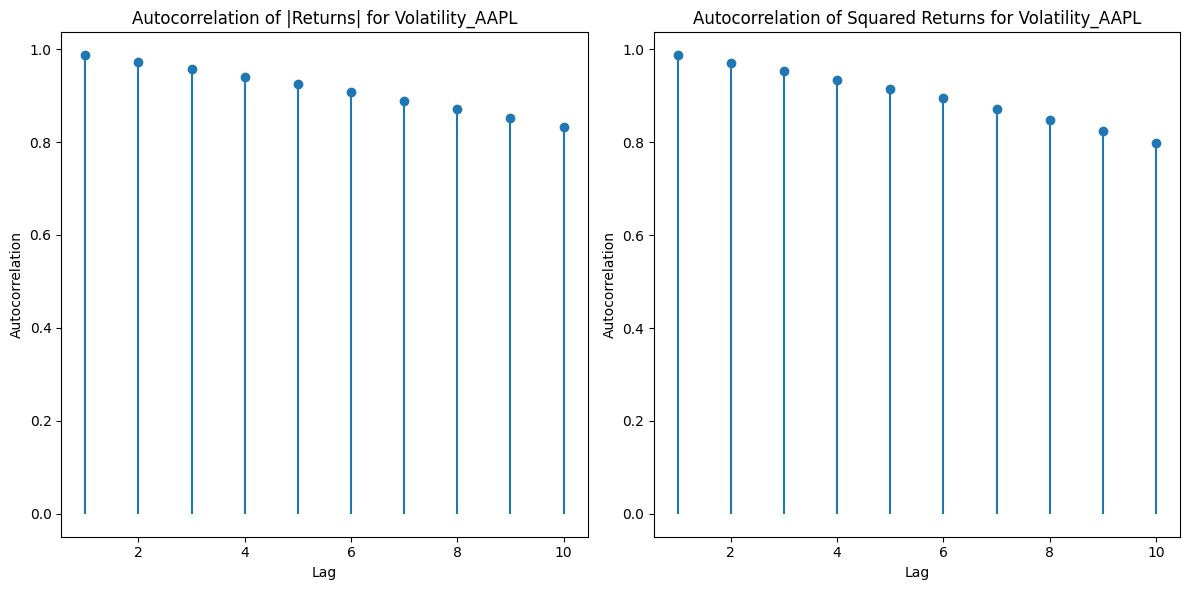

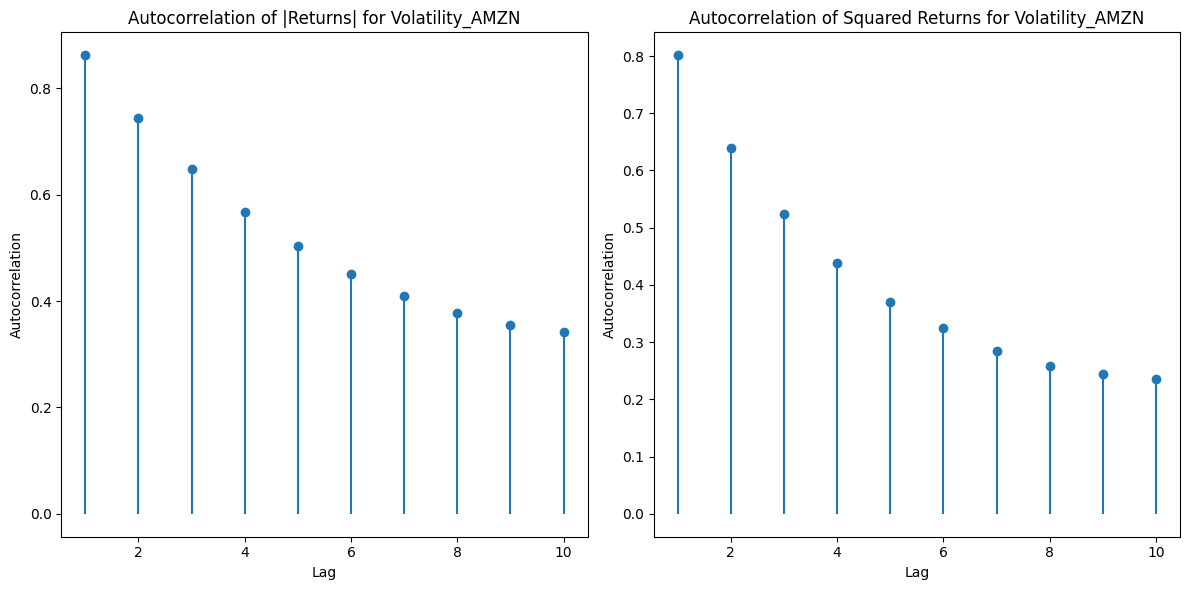

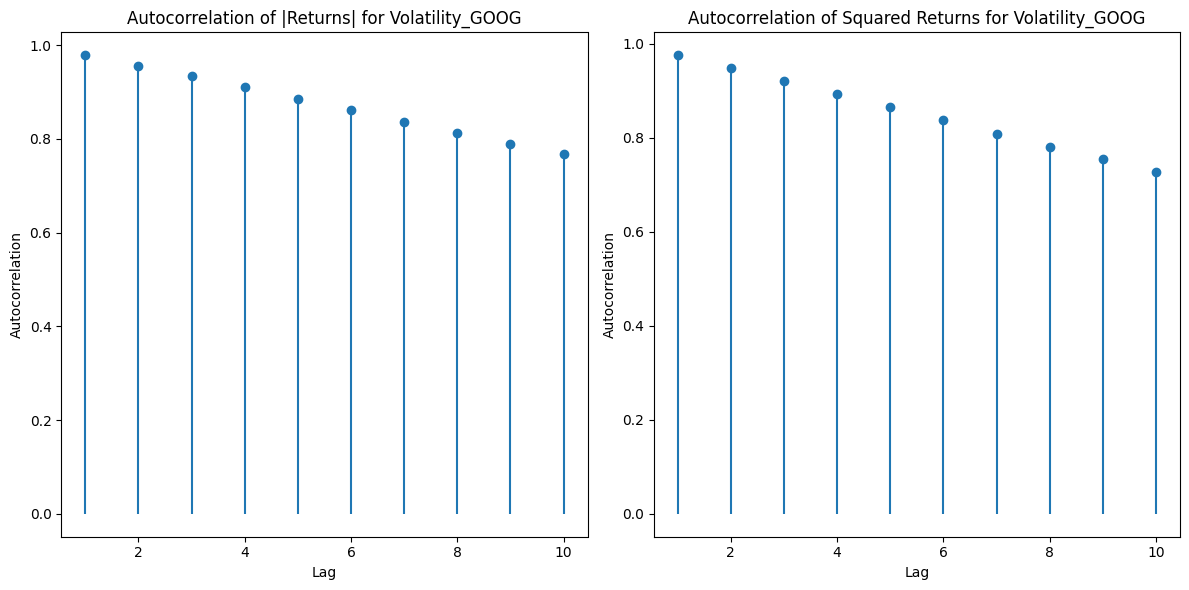

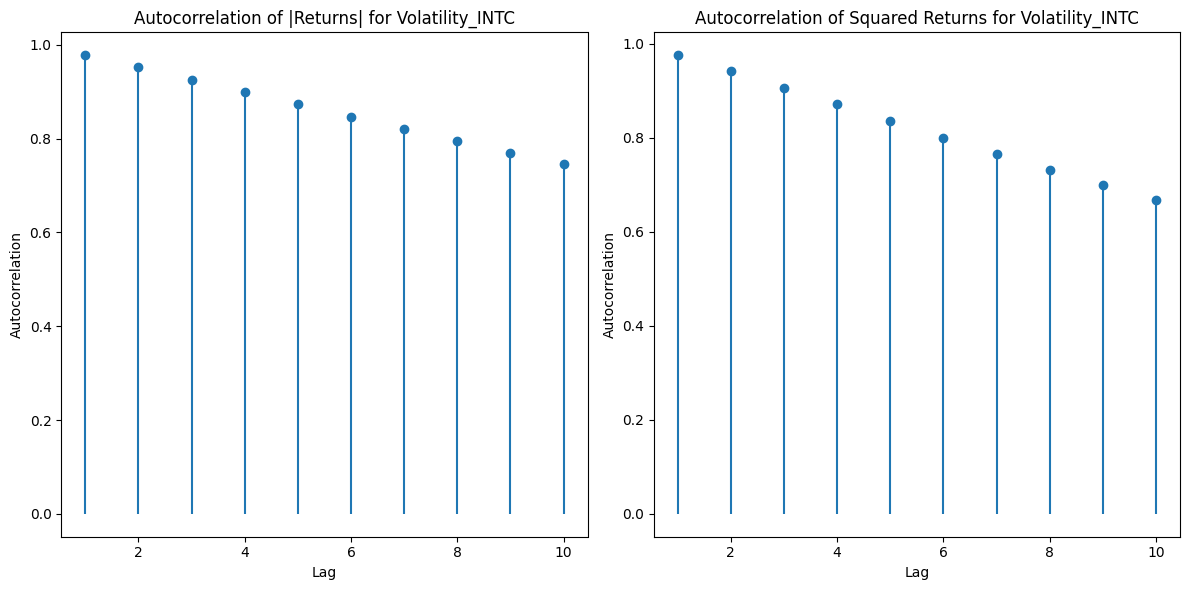

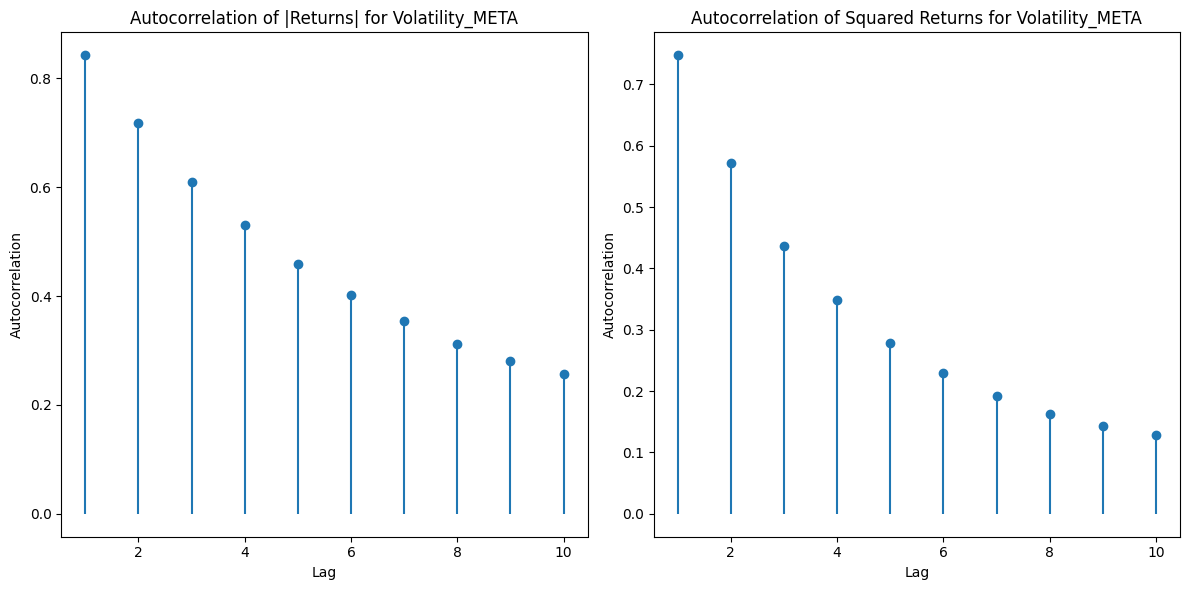

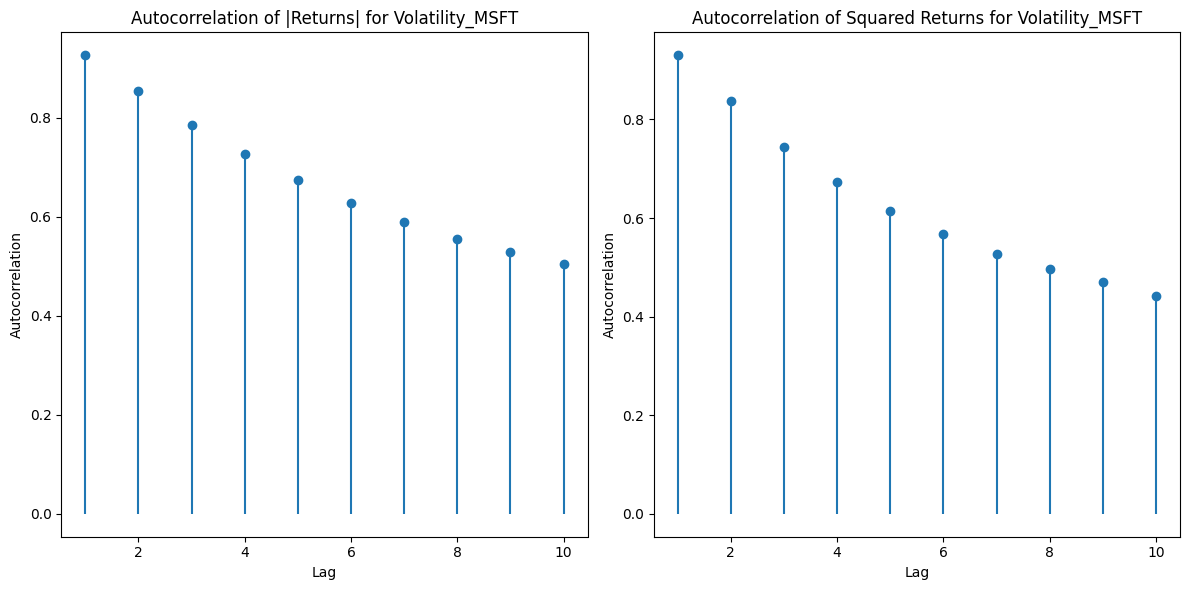

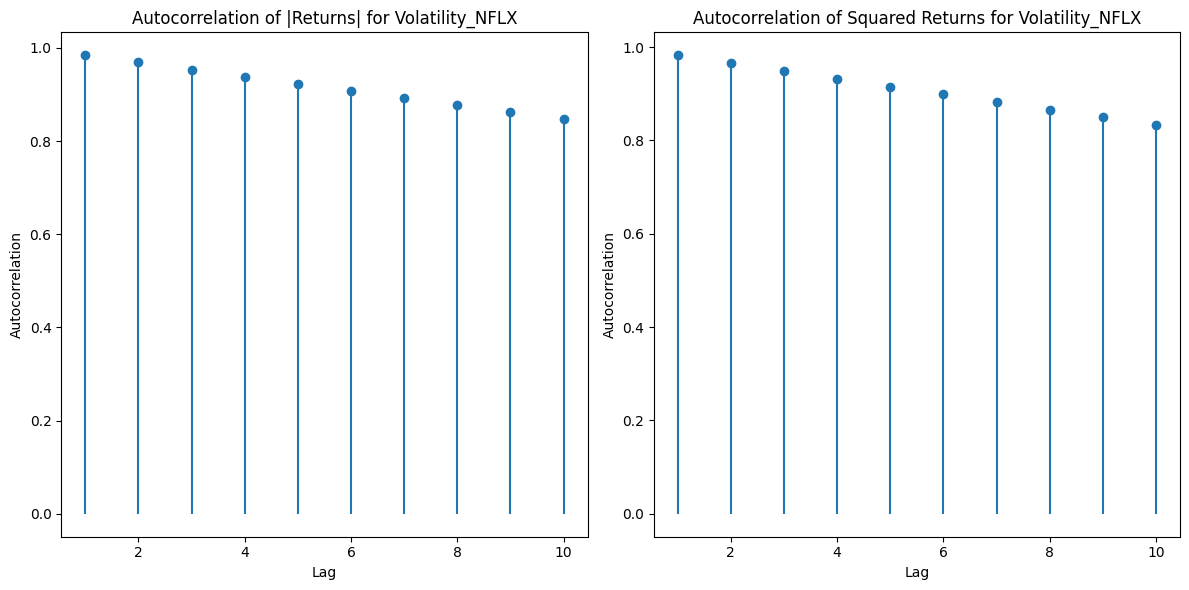

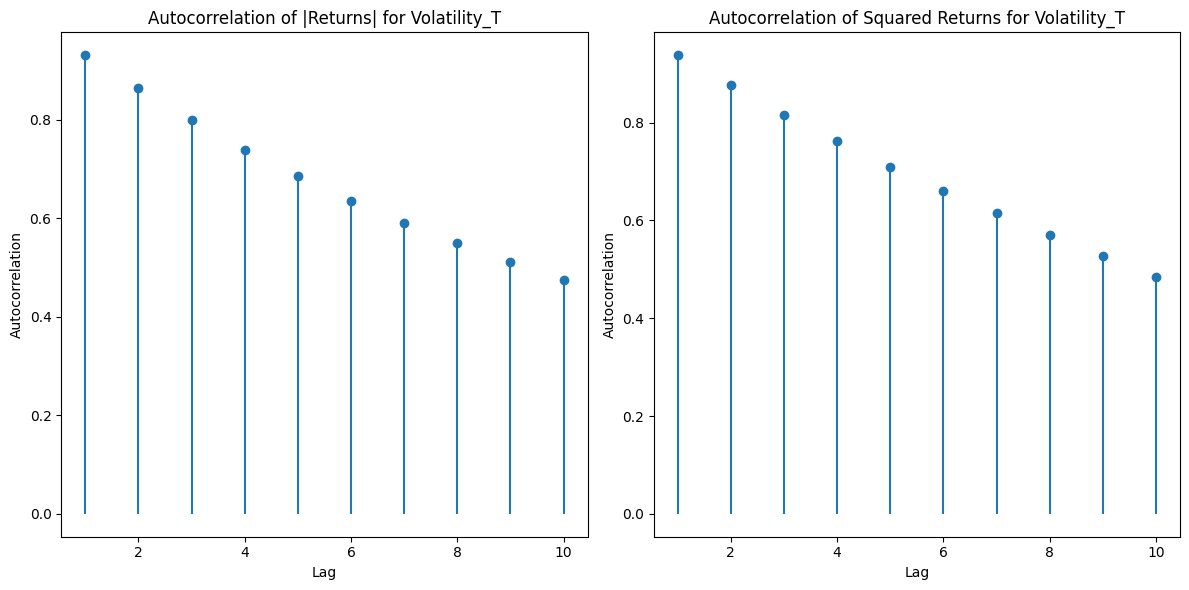

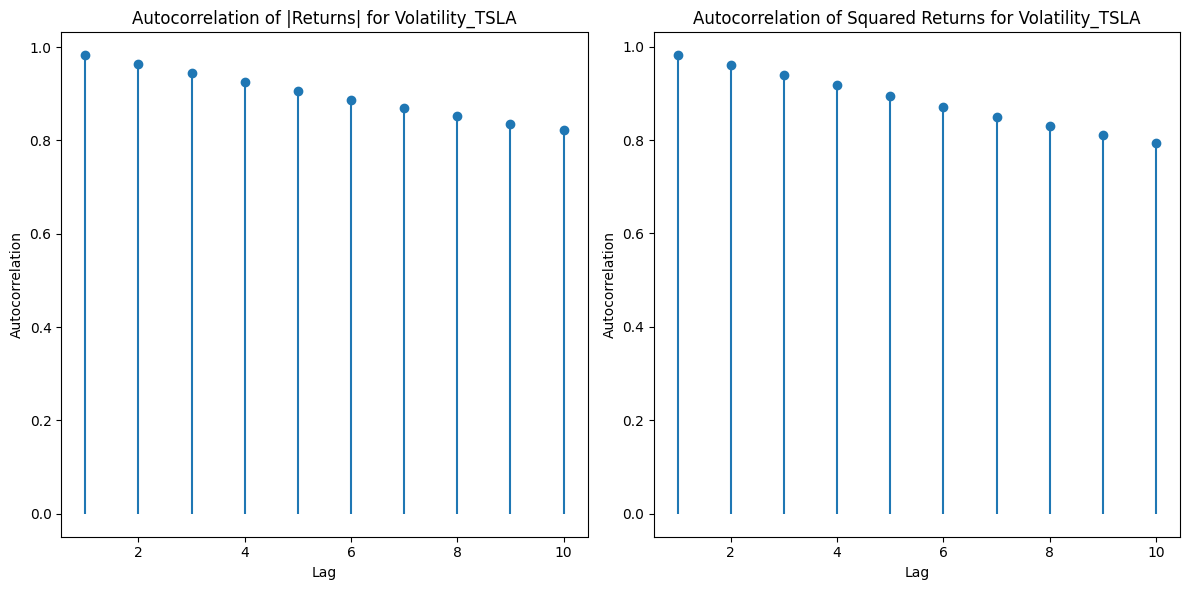

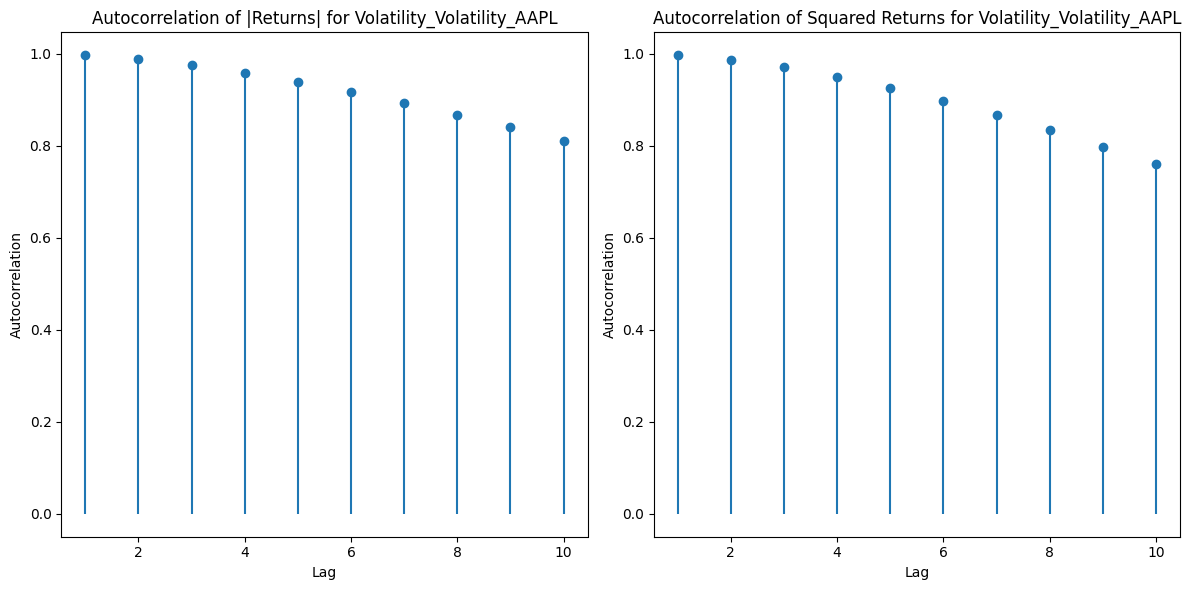

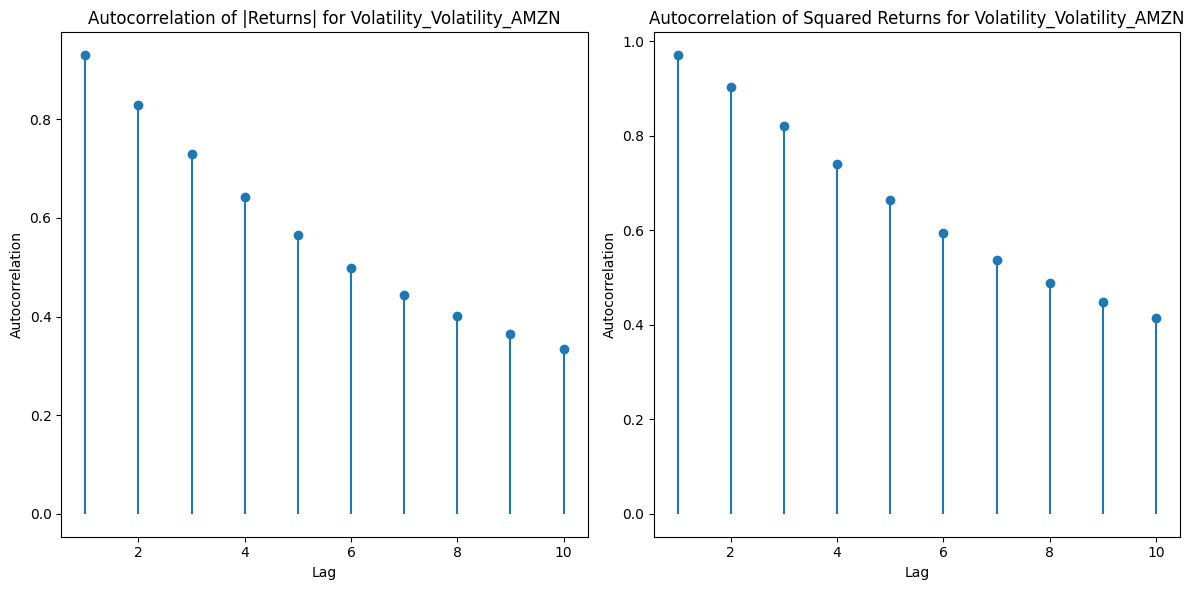

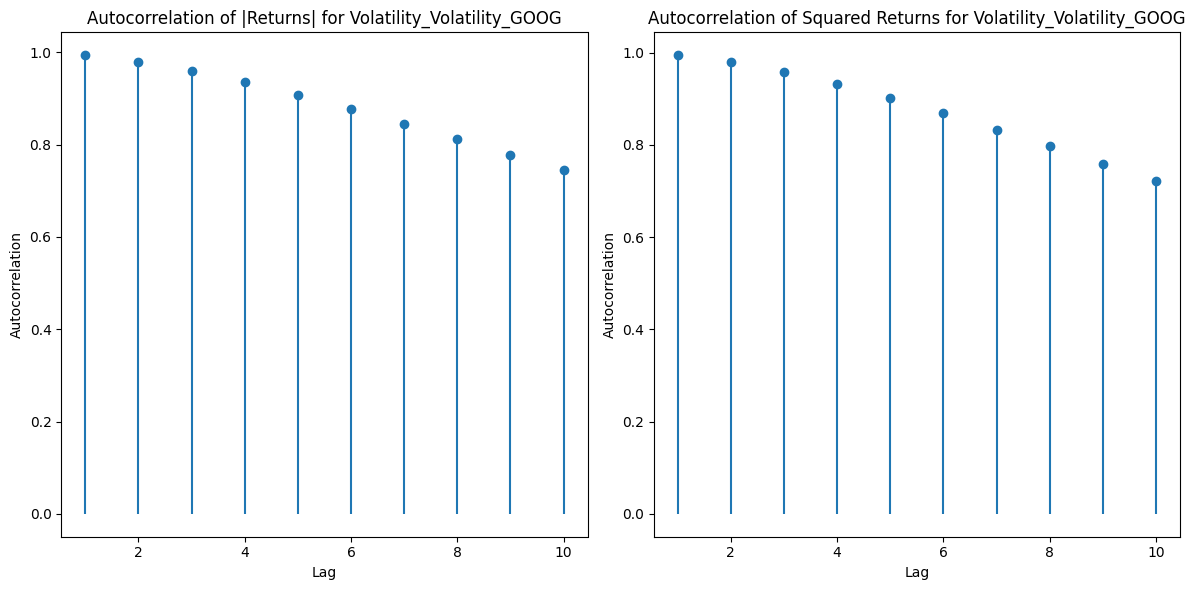

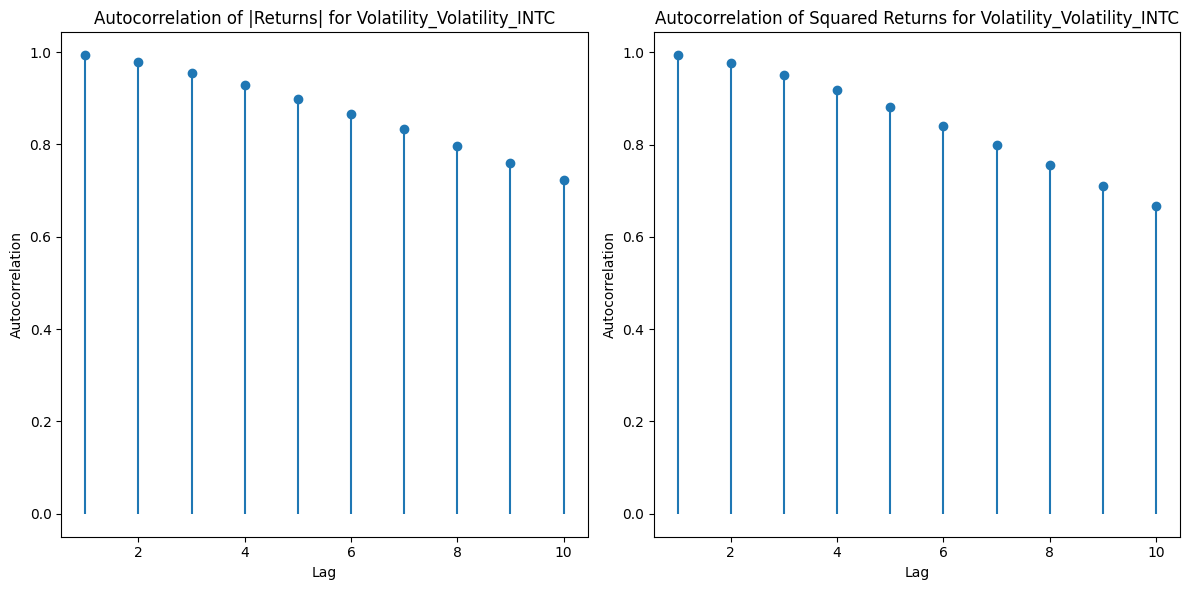

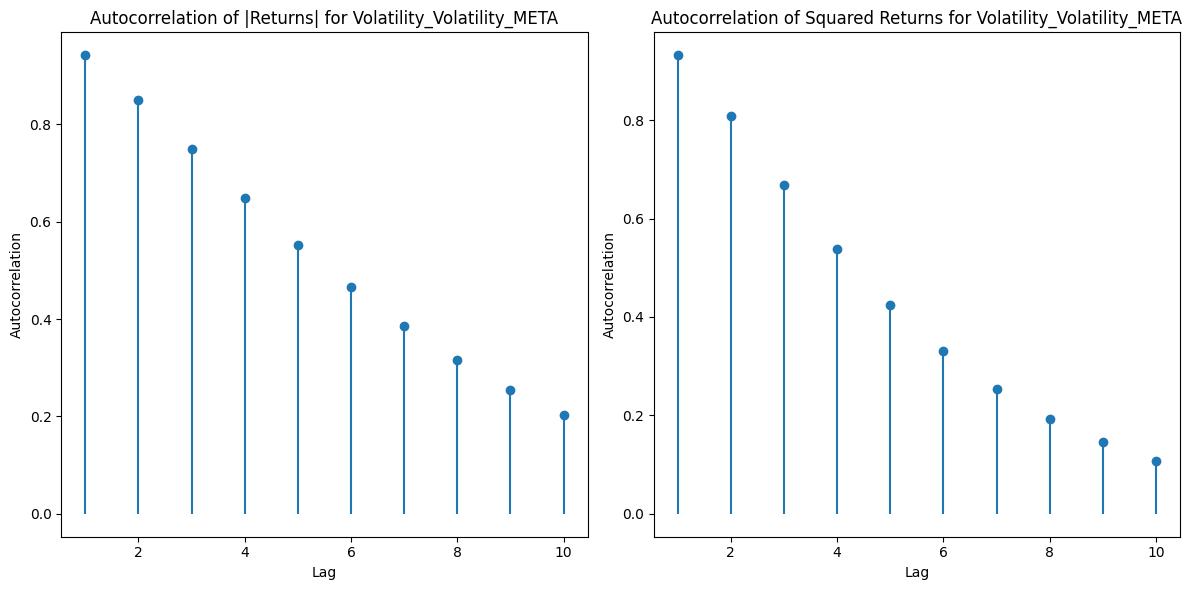

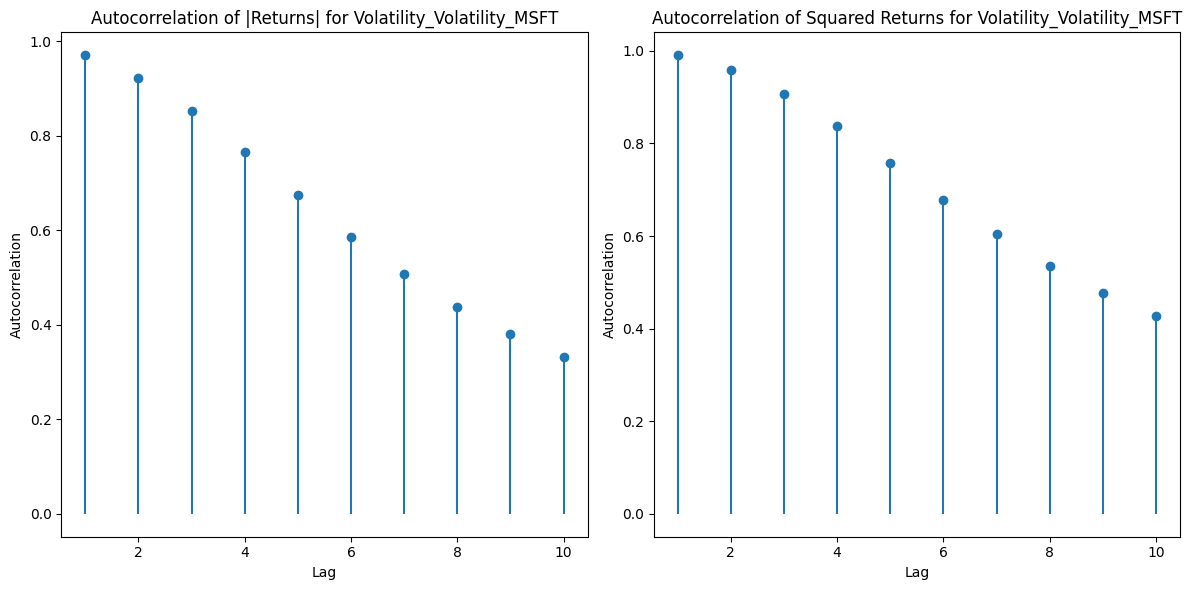

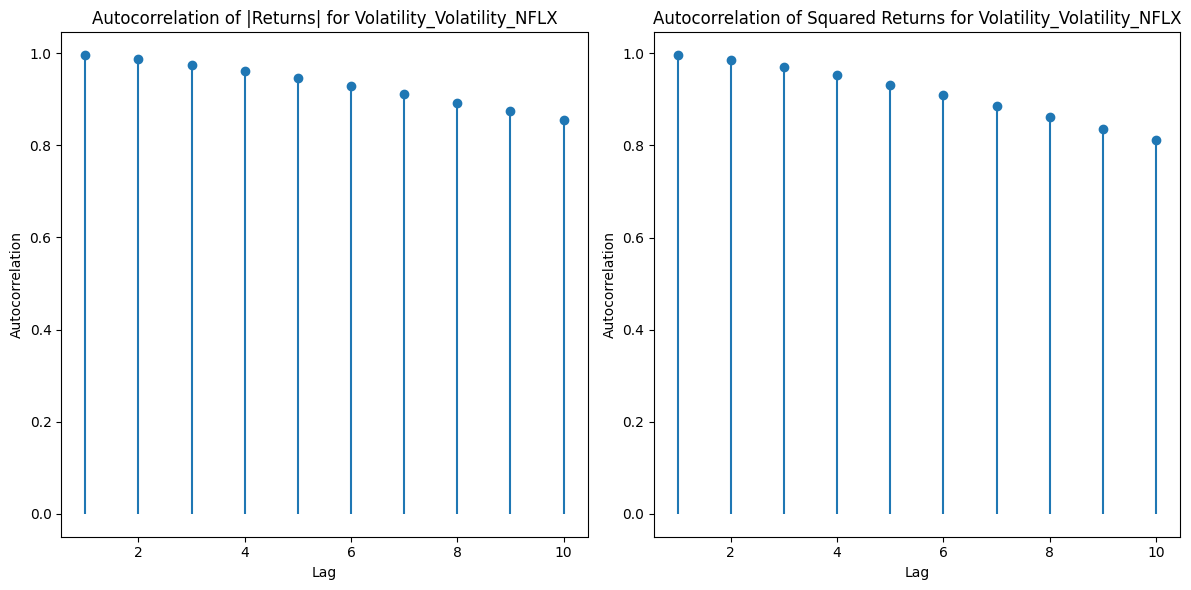

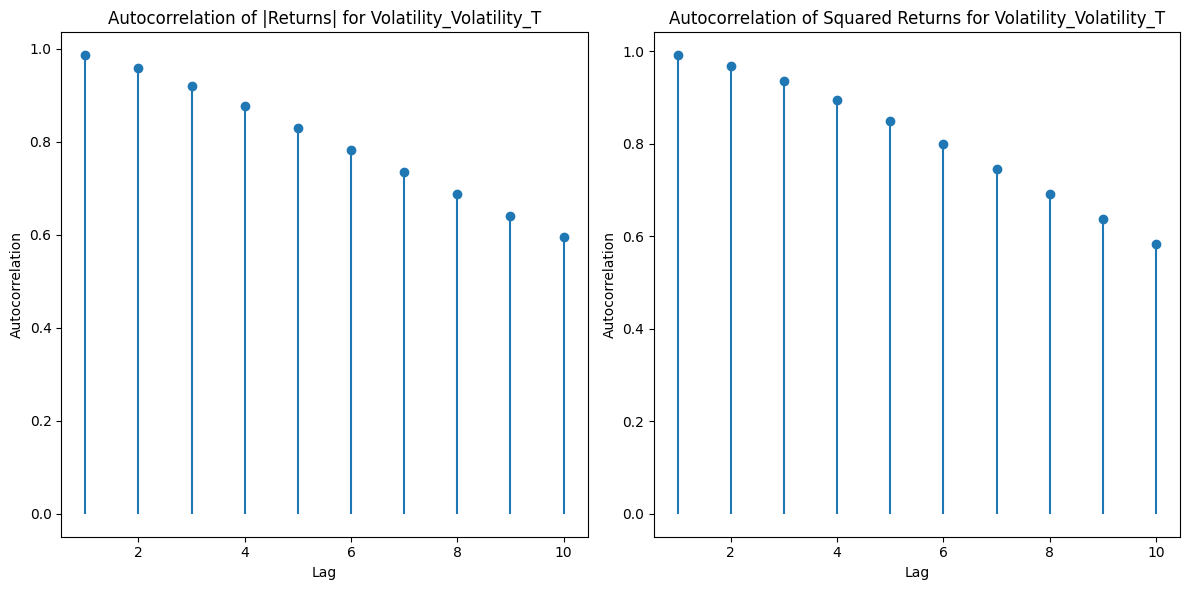

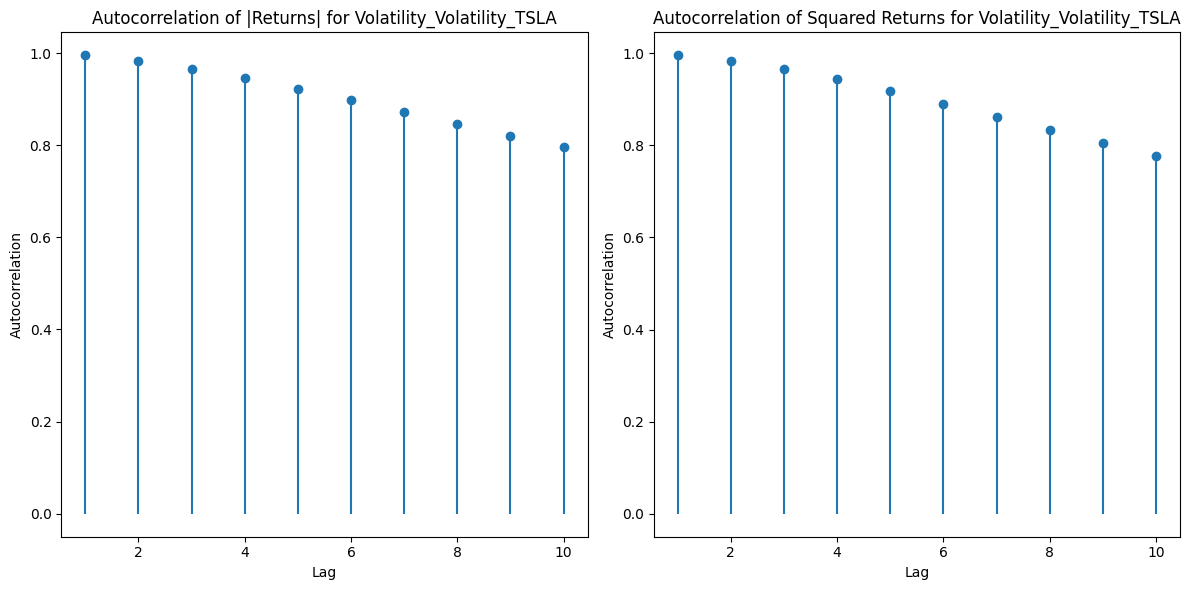

In [12]:
def taylor_effect(returns):
        for col in returns.columns:
            abs_returns = returns[col].abs()
            squared_returns = returns[col] ** 2

            autocorr_abs = [abs_returns.autocorr(lag=i) for i in range(1, 11)]
            autocorr_squared = [squared_returns.autocorr(lag=i) for i in range(1, 11)]

            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.stem(range(1, 11), autocorr_abs, basefmt=" ", use_line_collection=True)
            plt.title(f'Autocorrelation of |Returns| for {col}')
            plt.xlabel('Lag')
            plt.ylabel('Autocorrelation')

            plt.subplot(1, 2, 2)
            plt.stem(range(1, 11), autocorr_squared, basefmt=" ", use_line_collection=True)
            plt.title(f'Autocorrelation of Squared Returns for {col}')
            plt.xlabel('Lag')
            plt.ylabel('Autocorrelation')

            plt.tight_layout()
            plt.show()
            
taylor_effect(returns)

Stylized Fact 6: Aggregational Gaussianity. "At longer time scales (say, weekly or monthly returns, as opposed to daily or intraday returns), the distribution of returns becomes closer to a Gaussian distribution." Notice that the p-value for yearly is quite high.

In [19]:
def aggregational_gaussianity(returns):
    resampled_returns_weekly = returns.resample('W').agg('mean')
    resampled_returns_monthly = returns.resample('M').agg('mean')
    resampled_returns_yearly = returns.resample('Y').agg('mean')
    daily_kurtosis = returns.kurtosis()
    weekly_kurtosis = resampled_returns_weekly.kurtosis()
    monthly_kurtosis = resampled_returns_monthly.kurtosis()
    yearly_kurtosis = resampled_returns_yearly.kurtosis()
    
    print(f"Daily Returns Kurtosis: {daily_kurtosis.mean()}")
    print(f"Weekly Returns Kurtosis: {weekly_kurtosis.mean()}")
    print(f"Monthly Returns Kurtosis: {monthly_kurtosis.mean()}")
    print(f"Yearly Returns Kurtosis: {yearly_kurtosis.mean()}")
    
    daily_p_value = stats.normaltest(returns.dropna().values)[1]
    weekly_p_value = stats.normaltest(resampled_returns_weekly.dropna().values)[1]
    monthly_p_value = stats.normaltest(resampled_returns_monthly.dropna().values)[1]
    yearly_p_value = stats.normaltest(resampled_returns_yearly.dropna().values)[1]
    
    print(f"Daily Returns P-value for normality test: {daily_p_value.mean()}")
    print(f"Weekly Returns P-value for normality test: {weekly_p_value.mean()}")
    print(f"Monthly Returns P-value for normality test: {monthly_p_value.mean()}")
    print(f"Yearly Returns P-value for normality test: {yearly_p_value.mean()}")
aggregational_gaussianity(returns)

Daily Returns Kurtosis: 63.8332055186903
Weekly Returns Kurtosis: 40.341162466760316
Monthly Returns Kurtosis: 17.881952057415855
Yearly Returns Kurtosis: 2.5984549054308435
Daily Returns P-value for normality test: 4.620147617747156e-59
Weekly Returns P-value for normality test: 4.330401879720216e-07
Monthly Returns P-value for normality test: 0.004723164404548078
Yearly Returns P-value for normality test: 0.2091466788984264


C:\Users\zachb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
